# Proyecto basado en el análisis de la Deserción Estudiantil en la Facultad de Economía (2015-2024)

Realizado por: Daniel Fandiño y Jorge Ivan Espitia

# Construccion e inspección inicial de las bases de datos:

La fuente de la bases de datos se remite a los archivos e información suministrada por la Facultad de Economía de la Universidad Externado de Colombia

# Introducción

La deserción universitaria es un fenómeno multifacético que afecta significativamente los sistemas educativos, tanto desde una perspectiva institucional como individual. Según Tinto (1975), los factores que influyen en la decisión de abandonar una institución educativa se dividen en dos categorías principales: integración académica y social. La integración académica incluye elementos como el rendimiento académico, las habilidades previas y la preparación educativa, mientras que la integración social se refiere a la conexión del estudiante con su entorno universitario, como la calidad de las relaciones con compañeros y profesores. Este marco teórico ha sido complementado por investigaciones más recientes que destacan el papel de variables socioeconómicas y contextuales, como la distancia entre el hogar y la universidad (Márquez y Pérez, 2020) y el nivel socioeconómico del estudiante (Cabrera, 1992). Estudios empíricos muestran que los estudiantes provenientes de hogares de ingresos bajos enfrentan mayores barreras tanto financieras como psicológicas, lo que limita su capacidad para mantener una trayectoria educativa continua. Adicionalmente, factores familiares, como el apoyo emocional y financiero, también juegan un papel crucial en la permanencia universitaria. 

Desde una perspectiva analítica, las variables asociadas al rendimiento académico tienen un peso notable en la deserción. Indicadores como el promedio académico general, los resultados en pruebas específicas como matemáticas e inglés, y el número de materias perdidas son predictivos de la probabilidad de abandono (Rodríguez et al., 2018). Por ejemplo, un bajo rendimiento en asignaturas básicas como matemáticas puede ser indicativo de deficiencias en competencias fundamentales que impactan negativamente el desempeño general del estudiante. Además, el entorno educativo previo, como la calidad del colegio de procedencia y el nivel de preparación académica, también condiciona las probabilidades de éxito en la universidad (Oreopoulos y Petronijevic, 2013). Más allá de las capacidades académicas, las variables psicosociales y motivacionales, como el sentido de pertenencia al entorno universitario y la percepción de autoeficacia, son igualmente relevantes (Bandura, 1997). En conjunto, estas variables interactúan de manera compleja, configurando patrones de deserción que no solo reflejan las características individuales de los estudiantes, sino también las estructuras institucionales y sociales en las que están inmersos. 

El objetivo de este trabajo es poder desarrollar un modelo basado en inteligencia artificial que permita predecir, dados los datos de algún estudiante de Economía de la Universidad Externado de Colombia, si el estudiante puede desertar o no. Con esto, se busca poder asistir a los estudiantes que posean un riesgo alto de deserción, de modo a prevenir que abandonen la universidad.

En lo que respecta a lo teórico, nos basamos en estudios previos desarrollados por Daniel Fandiño, en colaboración con la Facultad de Economía de la Universidad Externado de Colombia, en el que habían identificado que algunas materias eran críticas para la continuidad en el programa académico. Por otra parte, utilizamos parte de la teoría planteada por el documento Deserción Estudiantil en la educación superior colombiana: Metodología de seguimiento, diagnóstico y elementos para su prevención (2009) del Ministerio de Educación, así como el trabajo de Mayra Alban y David Mauricio (2019) llamado Factors that influence Undergraduate University Desertion According to Students' Perspective.

# Construcción de Bases de datos:

En primer lugar, instalamos los paquetes necesarios para correr el código:

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

# Tratamiento de datos y análisis descriptivo

En este código normalizamos los nombres de las materias y algunos datos más, y hacemos gráficos descriptivos de las materias.

                 Materia Normalizada  Promedio  Mediana  Desviacion_Estandar  \
0                Economía Colombiana  3.766029    3.870             0.712916   
1  Historia de los Hechos Económicos  4.074900    4.210             0.652048   
2                    Ideas Políticas  3.984312    4.080             0.692943   
3       Introducción a la Economía 1  3.711234    3.750             0.794549   
4                      Matemáticas I  3.139263    3.290             1.014713   
5                     Matemáticas II  3.428190    3.420             0.710327   
6                    Matemáticas III  3.378350    3.440             0.764572   
7                    Microeconomía I  4.127171    4.190             0.517131   
8                     Álgebra Lineal  3.456851    3.465             0.767912   

   Minimo  Maximo  Frecuencia_pérdidas  Total_Estudiantes  
0    0.00    4.91                   57                749  
1    0.00    4.88                   12                453  
2    0.00    5.00  

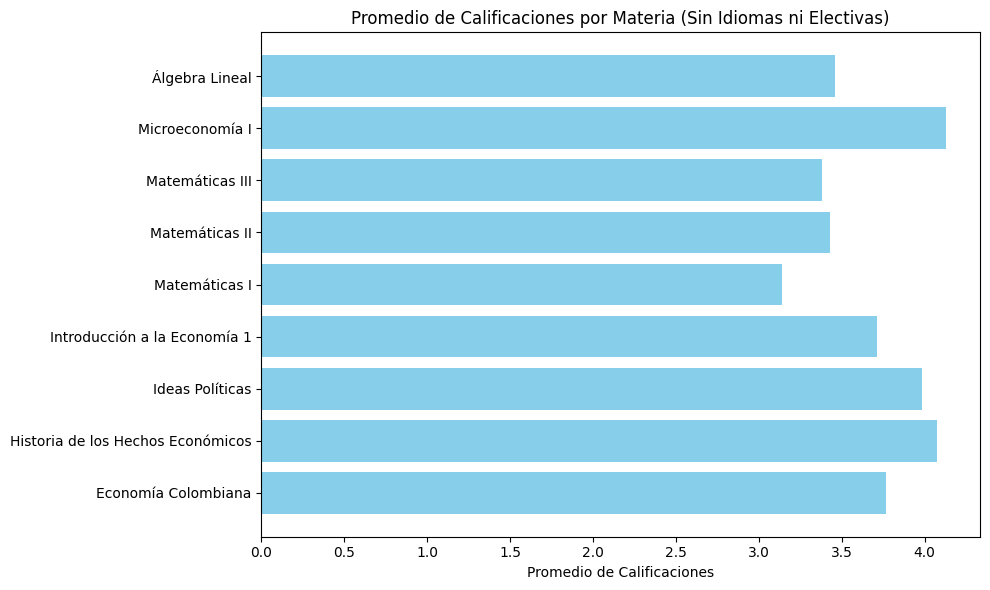

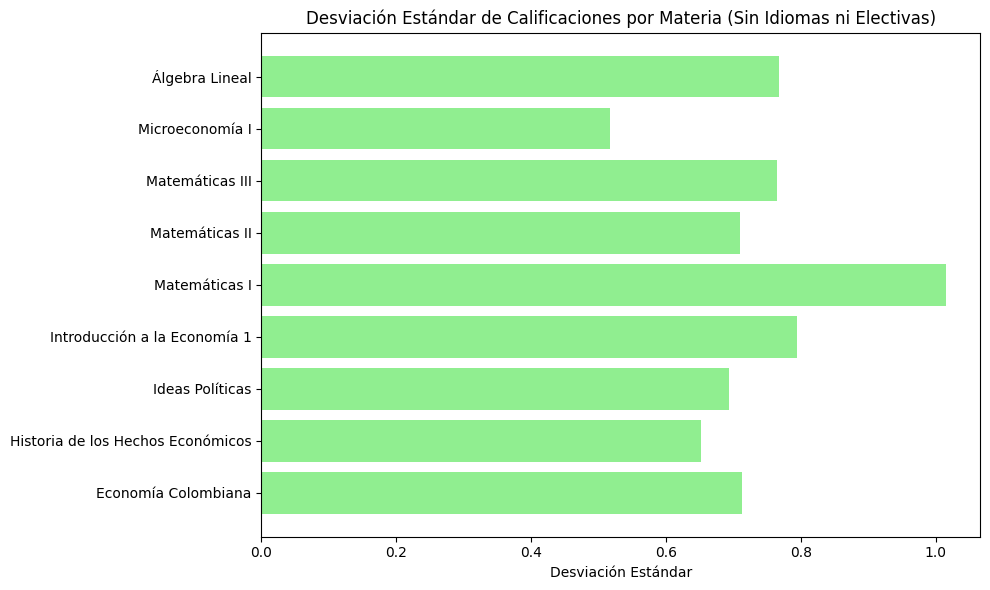

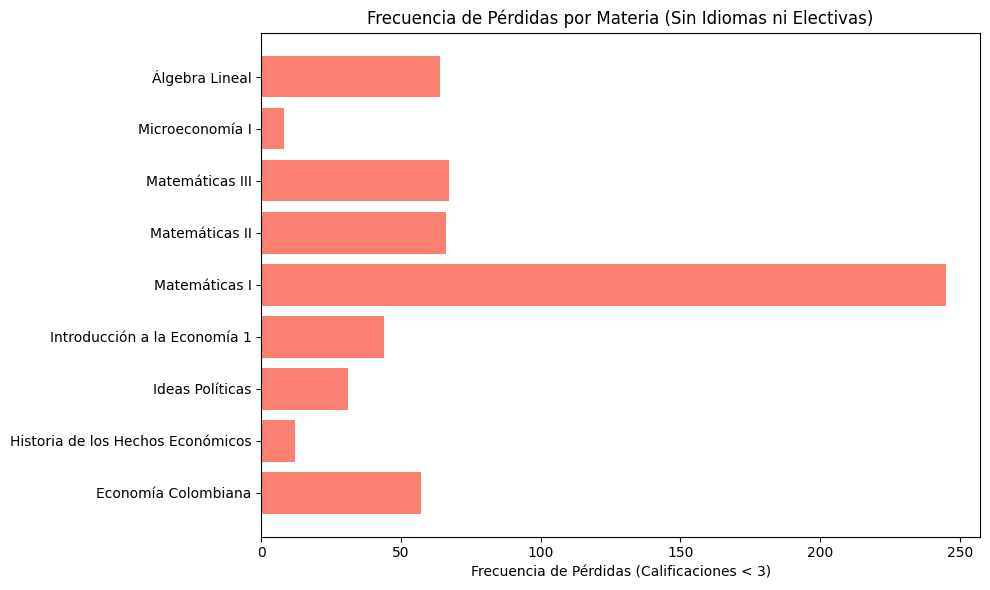

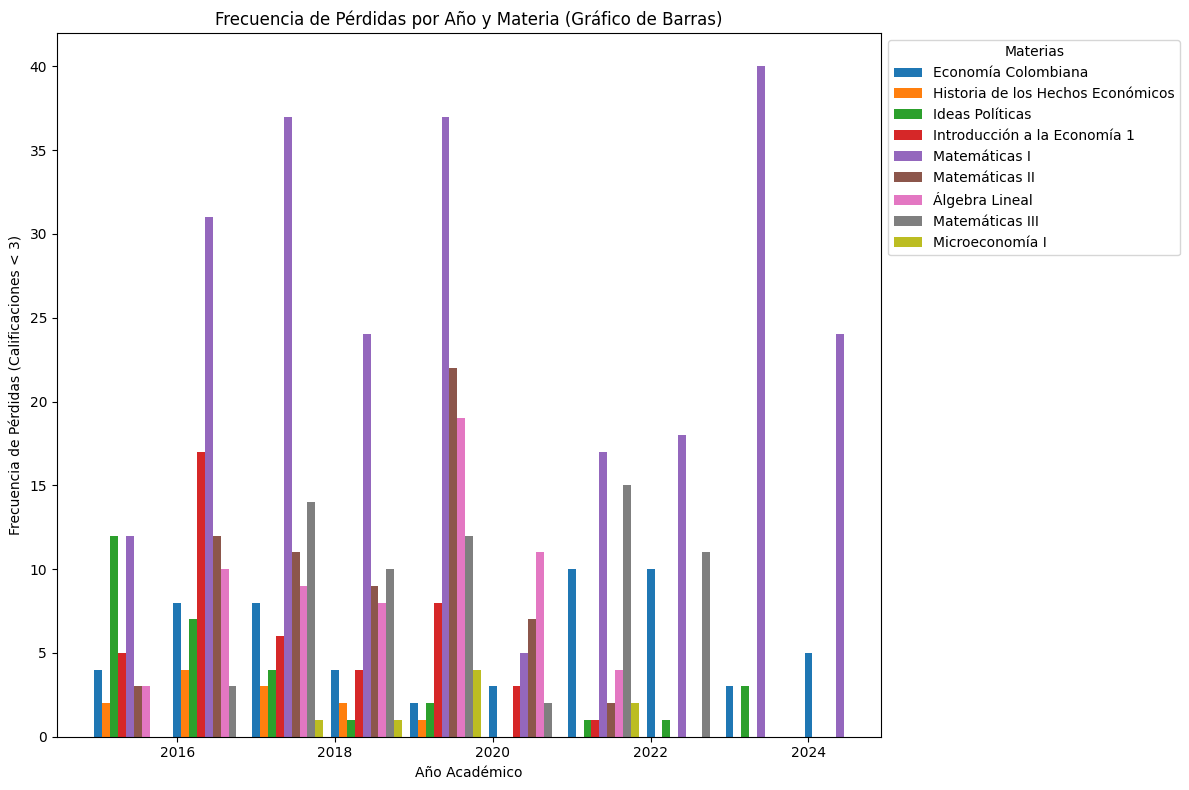

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Promedio por detalle 2015-2024.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Combine Sheet')

# Diccionario  normalizar nombres de materias
diccionario_materias = {
    "ECONOMIA COLOMBIANA": "Economía Colombiana",
    "HISTORIA GENERAL": "Historia de los Hechos Económicos",
    "IDEAS POLITICAS": "Ideas Políticas",
    "MATEMATICAS I": "Matemáticas I",
    "MATEMATICAS II": "Matemáticas II",
    "MATEMATICAS III": "Matemáticas III",
    "MICROECONOMIA I": "Microeconomía I",
    "INTRODUCCION A LA ECONOMIA I": "Introducción a la Economía 1",
    "ALGEBRA LINEAL": "Álgebra Lineal",
    "FUNDAMENTOS DE ESTADISTICA": "Fundamentos de Estadística",
    "MATEMATICAS FINANCIERAS": "Matemáticas Financieras",
}


df['Materia Normalizada'] = df['Nombre Materia'].map(diccionario_materias)
df_filtrado = df[df['Materia Normalizada'].notna()]
exclusiones = ["IDIOMA", "INGLÉS", "ELECTIVA"]
df_filtrado = df_filtrado[~df_filtrado['Nombre Materia'].str.contains('|'.join(exclusiones), case=False)]
df_filtrado['Nota Normal'] = pd.to_numeric(df_filtrado['Nota Normal'], errors='coerce')

# Agrupar por materia 
estadisticas_materias = df_filtrado.groupby('Materia Normalizada').agg(
    Promedio=('Nota Normal', 'mean'),
    Mediana=('Nota Normal', 'median'),
    Desviacion_Estandar=('Nota Normal', 'std'),
    Minimo=('Nota Normal', 'min'),
    Maximo=('Nota Normal', 'max'),
    Frecuencia_pérdidas=('Nota Normal', lambda x: (x < 3).sum()),
    Total_Estudiantes=('Documento', 'nunique')
).reset_index()

print(estadisticas_materias)

# Gráficos
plt.figure(figsize=(10, 6))
plt.barh(estadisticas_materias['Materia Normalizada'], estadisticas_materias['Promedio'], color='skyblue')
plt.xlabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones por Materia (Sin Idiomas ni Electivas)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(estadisticas_materias['Materia Normalizada'], estadisticas_materias['Desviacion_Estandar'], color='lightgreen')
plt.xlabel('Desviación Estándar')
plt.title('Desviación Estándar de Calificaciones por Materia (Sin Idiomas ni Electivas)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(estadisticas_materias['Materia Normalizada'], estadisticas_materias['Frecuencia_pérdidas'], color='salmon')
plt.xlabel('Frecuencia de Pérdidas (Calificaciones < 3)')
plt.title('Frecuencia de Pérdidas por Materia (Sin Idiomas ni Electivas)')
plt.tight_layout()
plt.show()

# Gráfico de Frecuencia de Pérdidas por Año y Materia en formato de barras
estadisticas_anio = df_filtrado.groupby(['Año Academico', 'Materia Normalizada']).agg(
    Frecuencia_pérdidas=('Nota Normal', lambda x: (x < 3).sum())
).reset_index()

plt.figure(figsize=(12, 8))
bar_width = 0.1
materias = estadisticas_anio['Materia Normalizada'].unique()
for i, materia in enumerate(materias):
    data_materia = estadisticas_anio[estadisticas_anio['Materia Normalizada'] == materia]
    plt.bar(data_materia['Año Academico'] + i * bar_width, data_materia['Frecuencia_pérdidas'], width=bar_width, label=materia)

plt.xlabel('Año Académico')
plt.ylabel('Frecuencia de Pérdidas (Calificaciones < 3)')
plt.title('Frecuencia de Pérdidas por Año y Materia (Gráfico de Barras)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Materias")
plt.tight_layout()
plt.show()


# Conteo del total de estudiantes = 763

Base #2

En este código observamos la distribución de la población por sexo y grupo étnico.

Total de estudiantes en Bogotá, D.C.: 656

Distribución de Estudiantes por Ciudad de Correspondencia:
   Ciudad de Correspondencia  Número de Estudiantes
0               BOGOTÁ, D.C.                    656
1              VILLAVICENCIO                     11
2                     SOACHA                     10
3                       CHÍA                      6
4                 FACATATIVÁ                      6
..                       ...                    ...
57                    CUMBAL                      1
58                    SOCOTÁ                      1
59                  SIBUNDOY                      1
60                  RESTREPO                      1
61                     PASTO                      1

[62 rows x 2 columns]

Distribución de Estudiantes por Sexo:
  Sexo  Número de Estudiantes
0    M                    425
1    F                    231

Distribución de Estudiantes por Grupo Étnico:
      Grupo Étnico  Número de Estudiantes
0     No pertenece               

C:\Users\dorju\AppData\Local\Temp\ipykernel_10528\819156631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['Sexo'] = df_bogota['Sexo'].str.strip()


Text(0, 0.5, 'Número de\xa0Estudiantes')

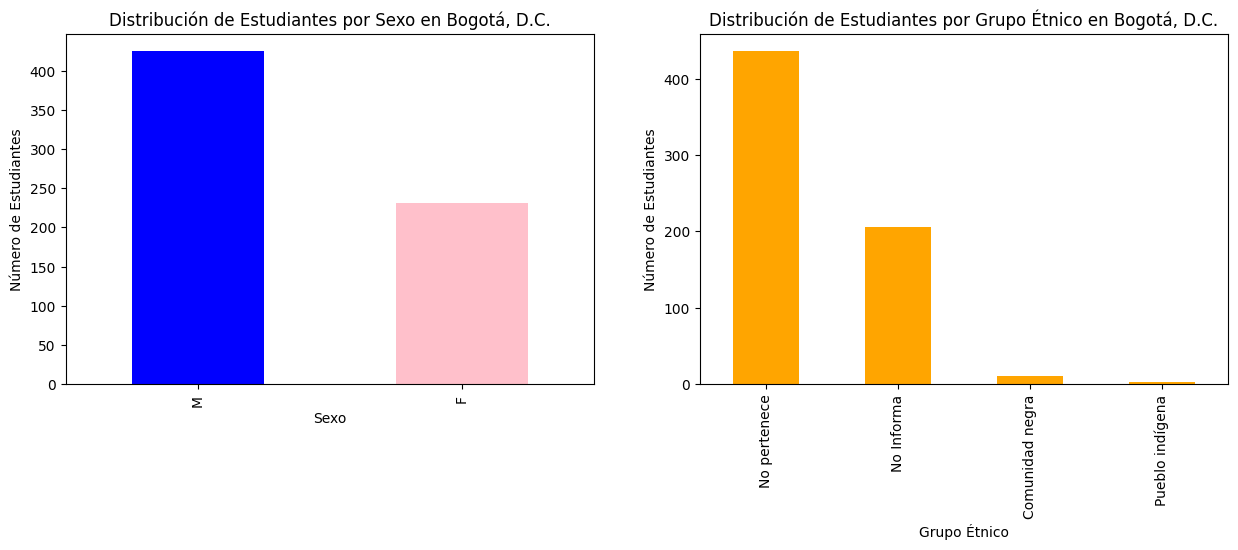

In [ ]:
import pandas as pd

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Estudiantes primer curso 2015 al 2024.xlsx'
df = pd.read_excel(file_path)

df_bogota = df[df['Ciudad de Correspondencia2'] == 'BOGOTÁ, D.C.']

# Limpiar los espacios en blanco en la columna 'Sexo'
df_bogota['Sexo'] = df_bogota['Sexo'].str.strip()

# Contar  número total de estudiantes en Bogotá
total_estudiantes = df_bogota.shape[0]
print(f'Total de estudiantes en Bogotá, D.C.: {total_estudiantes}')

# Contar 
sexo_count = df_bogota['Sexo'].value_counts()
grupo_etnico_count = df_bogota['Grupo étnico'].value_counts()
ciudad_count = df['Ciudad de Correspondencia2'].value_counts()


resultados = pd.DataFrame({
    'Ciudad de Correspondencia': ciudad_count.index,
    'Número de Estudiantes': ciudad_count.values
})

# Mostrar la tabla de resultados
print("\nDistribución de Estudiantes por Ciudad de Correspondencia:")
print(resultados)

# Data frames 
sexo_df = pd.DataFrame({
    'Sexo': sexo_count.index,
    'Número de Estudiantes': sexo_count.values
})


grupo_etnico_df = pd.DataFrame({
    'Grupo Étnico': grupo_etnico_count.index,
    'Número de Estudiantes': grupo_etnico_count.values
})

print("\nDistribución de Estudiantes por Sexo:")
print(sexo_df)

print("\nDistribución de Estudiantes por Grupo Étnico:")
print(grupo_etnico_df)

# Gráficos
plt.figure(figsize=(15, 10))

# Gráfico de sexo
plt.subplot(2, 2, 1)
sexo_count.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de Estudiantes por Sexo en Bogotá, D.C.')
plt.xlabel('Sexo')
plt.ylabel('Número de Estudiantes')

# Gráfico de grupos étnicos
plt.subplot(2, 2, 2)
grupo_etnico_count.plot(kind='bar', color='orange')
plt.title('Distribución de Estudiantes por Grupo Étnico en Bogotá, D.C.')
plt.xlabel('Grupo Étnico')
plt.ylabel('Número de Estudiantes')

base #3

A continuación, desarrollamos las estadísticas descriptivas de los periodos cursados y del promedio acumulado.

Estadísticas descriptivas del Promedio Acumulado:
count    763.000000
mean       3.610875
std        0.714948
min        0.000000
25%        3.376111
50%        3.788571
75%        4.032500
max        4.760000
Name: Promedio_Acumulado, dtype: float64


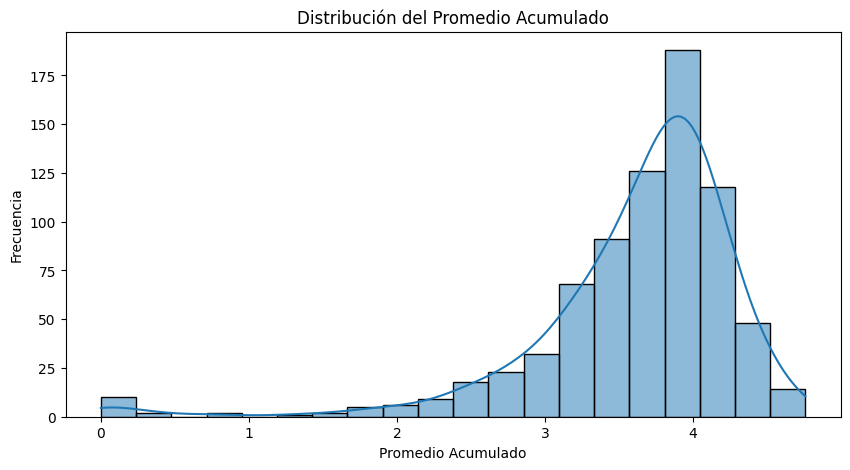

Promedio por Año Académico:
Año Academico
2015    3.630235
2016    3.653163
2017    3.688754
2018    3.768730
2019    3.700124
2020    3.971077
2021    3.955081
2022    3.836725
2023    3.764682
2024    3.707157
Name: Promedio Periodos, dtype: float64


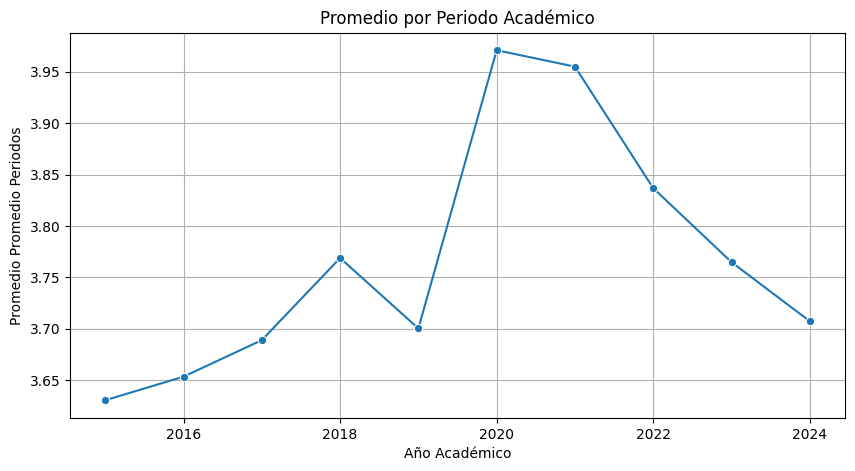

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Promedio por totales 2015-2024.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Agrupar por documento 
promedios = df.groupby('Documento').agg(
    Promedio_Acumulado=('Promedio Periodos', 'mean'),
    Periodos_Cursados=('Periodo Academico', 'count')
).reset_index()

print("Estadísticas descriptivas del Promedio Acumulado:")
print(promedios['Promedio_Acumulado'].describe())

# Gráfico 
plt.figure(figsize=(10, 5))
sns.histplot(promedios['Promedio_Acumulado'], bins=20, kde=True)
plt.title('Distribución del Promedio Acumulado')
plt.xlabel('Promedio Acumulado')
plt.ylabel('Frecuencia')
plt.show()

correlation = df.groupby('Año Academico')['Promedio Periodos'].mean()

# correlación
print("Promedio por Año Académico:")
print(correlation)

# Gráfico 
plt.figure(figsize=(10, 5))
sns.lineplot(data=correlation, marker='o')
plt.title('Promedio por Periodo Académico')
plt.xlabel('Año Académico')
plt.ylabel('Promedio Promedio Periodos')
plt.grid()
plt.show()



Podemos observar, con base a las gráficas anteriores, diferencias significativas en el promedio según el año académico en el que ingresaron los estudiantes a la universidad.

base #4

En esta linea de código, describimos el ranking de colegios a partir del municipio al que pertenecen y su desempeño en las pruebas Saber 11.

Total de colegios en categoría ELITE: 118
Total de colegios en otras categorías:
Calidad del colegio
ALTO      241
NORMAL    141
ELITE     118
Name: count, dtype: int64
Mejores colegios en Colombia:
     Ranking                   Institución        Municipio
0          1       Colegio Nuevo Cambridge    Floridablanca
1          2             Liceo Campo David           Bogotá
2          3    Gimnasio Colombo Británico           Bogotá
3          4       Colegio Anglo Americano           Bogotá
4          5   Colegio Bilingüe Diana Oese             Cali
..       ...                           ...              ...
113      114    Italiano Leonardo Da Vinci           Bogotá
114      115        Gimnasio Nuevo Modelia           Bogotá
115      116   Aspaen Gimnasio Los Corales  Puerto Colombia
116      117          Colegio Hebreo Unión     Barranquilla
117      118  Colegio San Gabriel Arcángel           Bogotá

[118 rows x 3 columns]
Frecuencia de colegios en las principales ciudades:
Munic

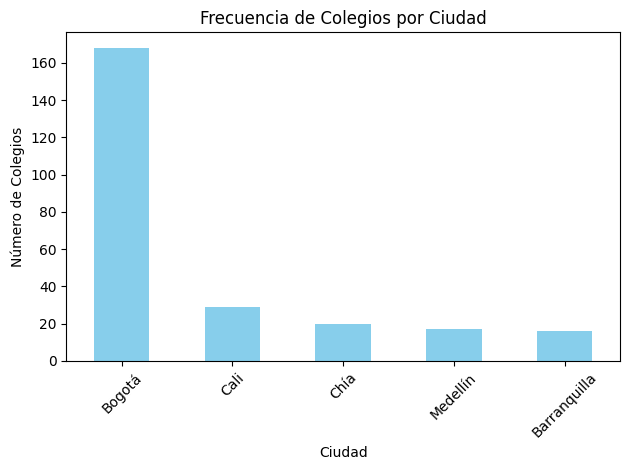

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\dorju\Desktop\Proyecto final\Ranking de Colegios.xlsx'
df = pd.read_excel(file_path)

# Contar 
elite_count = df[df['Calidad del colegio'] == 'ELITE'].shape[0]
print(f'Total de colegios en categoría ELITE: {elite_count}')

other_categories_count = df['Calidad del colegio'].value_counts()
print('Total de colegios en otras categorías:')
print(other_categories_count)

mejores_colegios = df[df['Calidad del colegio'] == 'ELITE'][['Ranking', 'Institución', 'Municipio']]
print('Mejores colegios en Colombia:')
print(mejores_colegios)

# Análisis 
frecuencia_ciudad = df['Municipio'].value_counts()

top_ciudades = frecuencia_ciudad.head(5)

print('Frecuencia de colegios en las principales ciudades:')
print(top_ciudades)

# gráfico de barras
top_ciudades.plot(kind='bar', title='Frecuencia de Colegios por Ciudad', color='skyblue')
plt.xlabel('Ciudad')
plt.ylabel('Número de Colegios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que la mayoría de los estudiantes son provenientes de Bogotá o sus alrededores.

Base #5

En este código, adecuamos los resultados del Saber 11 por categorías y describimos sus características.

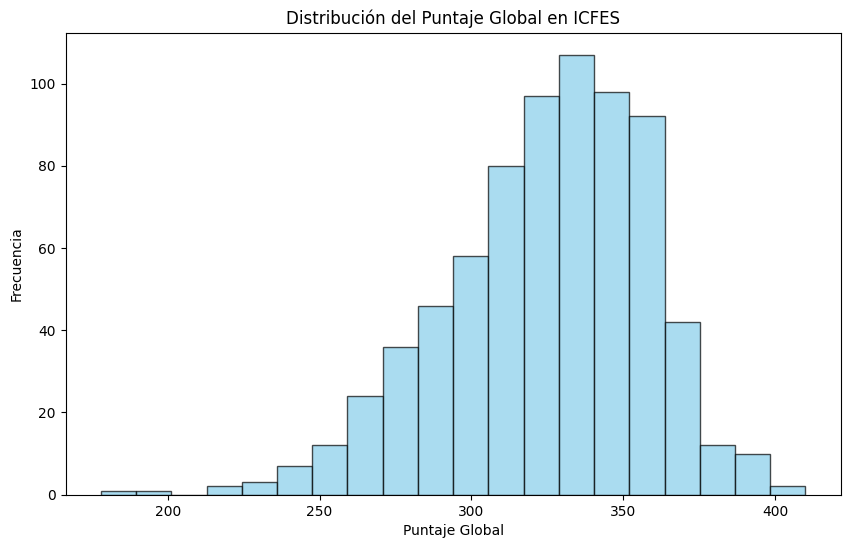

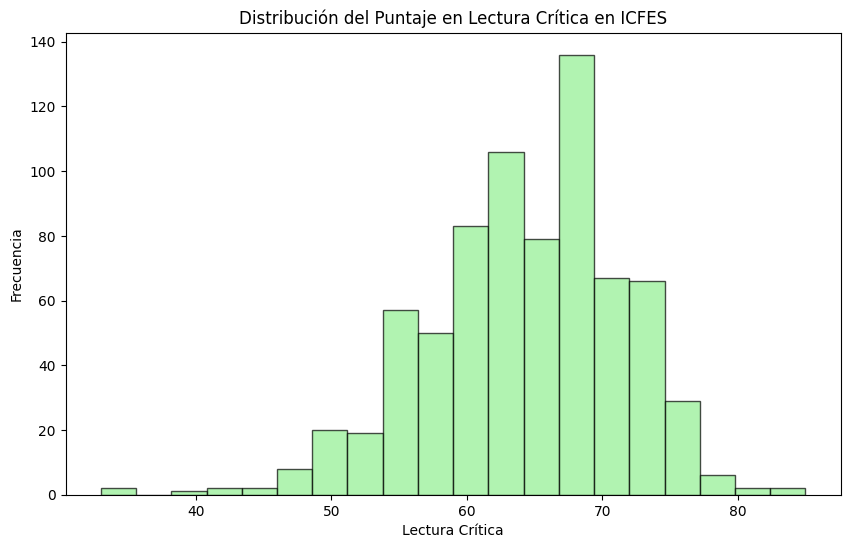

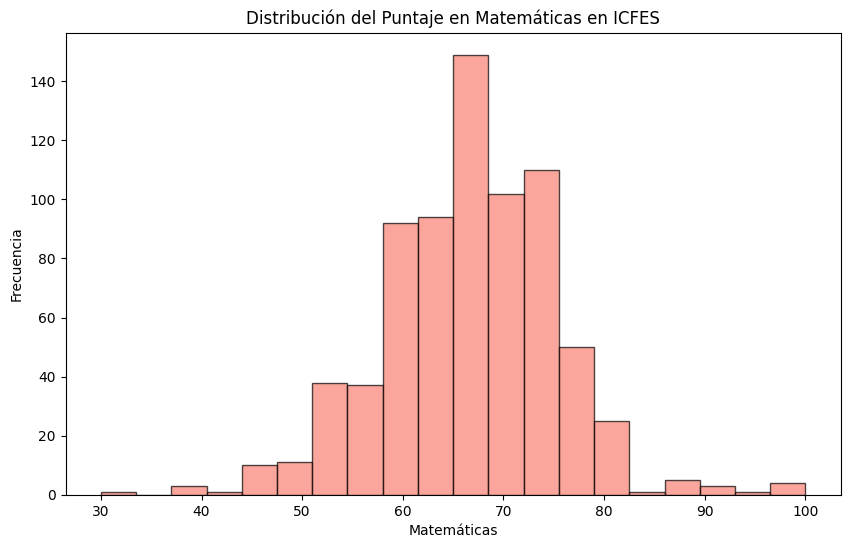

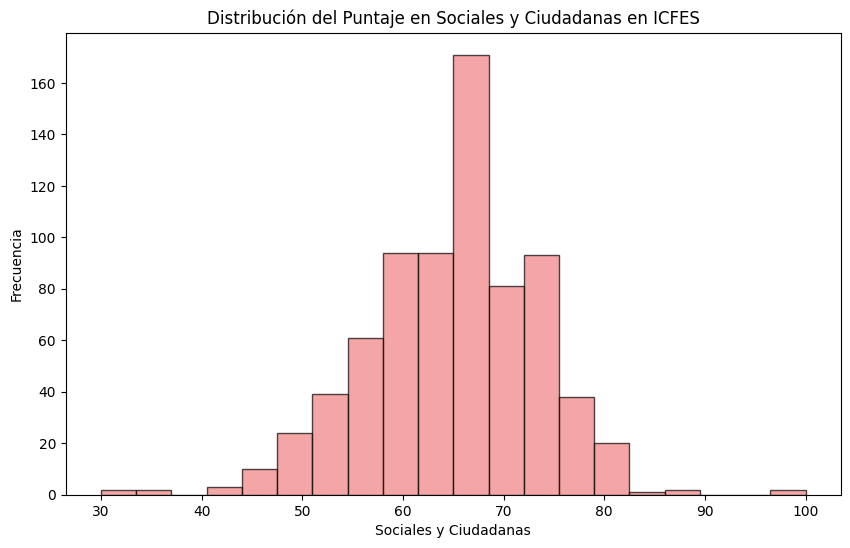

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base icfes.xlsx'
xls = pd.ExcelFile(file_path)
df_icfes = pd.read_excel(xls, sheet_name='Examen ICFES 2015-2016')

# Selección y limpieza de columnas
df_icfes = df_icfes[['NUM_DOCUMENTO', 'NOMBRE', 'Puntaje Global', 'Lectura Crítica', 'Matemáticas', 'Sociales y Ciudadanas']]
df_icfes = df_icfes.dropna(subset=['NUM_DOCUMENTO', 'Puntaje Global'])

numeric_columns = ['Puntaje Global', 'Lectura Crítica', 'Matemáticas', 'Sociales y Ciudadanas']
df_icfes[numeric_columns] = df_icfes[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Histogramas

plt.figure(figsize=(10, 6))
plt.hist(df_icfes['Puntaje Global'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje Global en ICFES')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_icfes['Lectura Crítica'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Lectura Crítica')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje en Lectura Crítica en ICFES')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_icfes['Matemáticas'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
plt.xlabel('Matemáticas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje en Matemáticas en ICFES')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_icfes['Sociales y Ciudadanas'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Sociales y Ciudadanas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje en Sociales y Ciudadanas en ICFES')
plt.show()




# Union de las bases de datos  - (Puntos 3 y 4)

Después de describir cada una de las variables que serán usadas para estimar el modelo de deserción, procederemos a organizar los datos en un solo excel, de modo a que cada estudiante sea una fila, y sea posible tener toda la información requerida de las variables en las columnas.

In [ ]:
import pandas as pd

file_path1 = r'C:\Users\Daniel\Desktop\Proyecto final\Promedio por detalle 2015-2024.xlsx'
file_path2 = r'C:\Users\Daniel\Desktop\Proyecto final\Estudiantes primer curso 2015 al 2024.xlsx'

promedio_detalle = pd.read_excel(file_path1, sheet_name='Combine Sheet')
estudiantes_curso = pd.read_excel(file_path2, sheet_name='Listado primer curso 2015-2024')

promedio_detalle['Documento'] = promedio_detalle['Documento'].astype(str).str.strip()
estudiantes_curso['NUM_DOCUMENTO'] = estudiantes_curso['NUM_DOCUMENTO'].astype(str).str.strip()

# Combinar las dos tablas utilizando el número de documento
combined_data = pd.merge(promedio_detalle, estudiantes_curso, left_on='Documento', right_on='NUM_DOCUMENTO', how='inner')

# Union otra base
file1_path = r'C:\Users\Daniel\Desktop\Proyecto final\Promedio por totales 2015-2024.xlsx'
df_file1 = pd.read_excel(file1_path, sheet_name='Hoja3')

df_file1['Documento'] = df_file1['Documento'].astype(str).str.strip()

# Crear una columna para cada combinación de año académico y período
df_file1['Periodo'] = df_file1['Año Academico'].astype(str) + '-' + df_file1['Periodo Academico'].astype(str)

# Convertir los períodos en columnas con los promedios correspondientes
pivot_totales = df_file1.pivot(index='Documento', columns='Periodo', values='Promedio Periodos').reset_index()

# Combinar los datos pivotados con la tabla combinada original
merged_df = pd.merge(combined_data, pivot_totales, on='Documento', how='left')

# Unificación de columnas con nombres similares dentro del mismo DataFrame
columns_to_merge = {
    'Apellidos y Nombres Estudiante': 'Nombre Completo',
    'Codigo Materia': 'Código Materia'
}

for old_col, new_col in columns_to_merge.items():
    if old_col in merged_df.columns and new_col in merged_df.columns:
        merged_df[new_col] = merged_df[new_col].combine_first(merged_df[old_col])
        merged_df.drop(columns=[old_col], inplace=True)  # Eliminar la columna antigua

# Eliminar columnas completamente duplicadas en contenido
data_cleaned = merged_df.T.drop_duplicates().T
columns_to_check_materias = ['Documento', 'Codigo Materia', 'Nombre Materia']
data_cleaned_materias = data_cleaned.drop_duplicates(subset=columns_to_check_materias)

output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_combinada.xlsx'
data_cleaned_materias.to_excel(output_path, index=False)

print("Archivo combinado y limpio guardado exitosamente en:", output_path)


En el siguiente código, eliminamos las columnas no deseadas de la base de datos: tanto las variables que no usaremos, como las columnas duplicadas (en el siguiente).

In [ ]:
import pandas as pd

# Cargar el archivo Excel previamente combinado
file_path_combined = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_combinada.xlsx'

# Leer el archivo Excel generado previamente
df_combined = pd.read_excel(file_path_combined)

# Lista de columnas a eliminar
columns_to_drop = [
    'Plan de Estudios Cód_y',
    'Nombre Plan_y',
    'Tipo de registro_y',
    'Apellidos y Nombres Estudiante_y',
    'Año Académico',
    'Periodo Academico_x',
    'Estudiante',
    'NUM_DOCUMENTO',
    'Plan de Estudios',
    'NOMBRE',
    'Id_Tipo_Documento'
]

# Eliminar las columnas especificadas
df_cleaned = df_combined.drop(columns=columns_to_drop, errors='ignore')

# Guardar el DataFrame limpio en un nuevo archivo Excel
output_path_cleaned = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_limpiada.xlsx'
df_cleaned.to_excel(output_path_cleaned, index=False)

# Mostrar la ruta donde se ha guardado el archivo
print(f'Archivo limpio guardado en: {output_path_cleaned}')


Archivo limpio guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_limpiada.xlsx


In [ ]:
import pandas as pd

# Cargar el archivo Excel (usa barra invertida doble o barra normal)
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_limpiada.xlsx'
df = pd.read_excel(file_path)

# Definir las columnas clave para verificar duplicados
columns_to_check = ['Documento', 'Nombre Materia']

# Eliminar filas duplicadas basadas en las columnas especificadas
df_cleaned = df.drop_duplicates(subset=columns_to_check)

# Guardar el resultado limpio en un nuevo archivo Excel
output_path_cleaned = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_sin_duplicados.xlsx'
df_cleaned.to_excel(output_path_cleaned, index=False)

# Mostrar la ruta donde se ha guardado el archivo limpio
print(f'Archivo limpio guardado en: {output_path_cleaned}')



Archivo limpio guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_sin_duplicados.xlsx


En el siguiente código, modificamos las columnas de inglés, asignándoles un número del 1 al 6 según el nivel más alto que el estudiante haya aprobado.

In [ ]:
import pandas as pd

# Cargar la base de datos
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_de_datos_sin_duplicados.xlsx'
df = pd.read_excel(file_path)

# Crear las columnas dummy para los niveles de inglés (del 1 al 6) usando la columna 'Nombre Adicional (MAT. Equiv.)'
for nivel in range(1, 7):
    df[f'Inglés_{nivel}'] = df['Nombre Adicional(MAT. Equiv.)'].apply(lambda x: 1 if f'INGLES {nivel}' in str(x).upper() else 0)

# Verificar para cada estudiante los niveles cursados y asignar el nivel más alto a todas las filas de ese estudiante
for doc in df['Documento'].unique():
    # Obtener las filas del estudiante
    df_estudiante = df[df['Documento'] == doc]
    
    # Verificar el nivel más alto de inglés que ha cursado el estudiante
    max_nivel = max([nivel for nivel in range(1, 7) if df_estudiante[f'Inglés_{nivel}'].sum() > 0], default=0)
    
    # Actualizar todas las filas del estudiante con el nivel más alto cursado
    for nivel in range(1, 7):
        if nivel <= max_nivel:
            df.loc[df['Documento'] == doc, f'Inglés_{nivel}'] = 1
        else:
            df.loc[df['Documento'] == doc, f'Inglés_{nivel}'] = 0

# Guardar el archivo actualizado
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_ingles.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Archivo guardado con éxito en: {output_file_path}")


Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_ingles.xlsx


En este bloque de código, clasificamos a cada estudiante según si está activo, graduado o ha desertado. Esto nos ayudará a definir nuestra variable Y.

In [ ]:

import pandas as pd
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_ingles.xlsx'
df = pd.read_excel(file_path)

# Asegurarse de que las columnas requeridas existen en el archivo
required_columns = ['Año Academico', 'Semestre Ubicacion']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Faltan las siguientes columnas necesarias en el archivo: {missing_columns}")
else:
    # Función para clasificar el estado del estudiante
    def clasificar_estado_estudiante(row):
        # Estudiantes activos (registrados en 2024 o en 2023 con semestres altos)
        if row['Año Academico'] >= 2023 and row['Semestre Ubicacion'] > 6:
            return 'Activo'

        # Estudiantes que completaron al menos 9 semestres antes de 2024 se consideran graduados
        if row['Semestre Ubicacion'] >= 9 and row['Año Academico'] < 2024:
            return 'Graduado'

        # Estudiantes que dejaron de aparecer antes de 2023 y tienen semestres bajos se consideran desertores
        if row['Semestre Ubicacion'] <= 6 and row['Año Academico'] < 2023:
            return 'Desertor'

        # Si no cumple ninguna de estas condiciones, el estudiante es considerado activo
        return 'Activo'

    # Aplicar la clasificación a cada estudiante
    df['Estado Estudiante'] = df.apply(clasificar_estado_estudiante, axis=1)

    # Guardar el archivo Excel con el resultado
    output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificada.xlsx'
    df.to_excel(output_path, index=False)
    print(f'Archivo guardado en: {output_path}')


Archivo guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificada.xlsx


# Ahora vamos a clasificar a los estudiantes -> Esto con la finalidad de crear nuestra variable objetivo!

En el siguiente bloque de código, definimos si el estudiante perdió Algebra, Introducción a la Economía 1 o Matemáticas 1, 2 o 3. Se había hecho un estudio previo, el cual había arrojado que estas materias son las que influyen más en la deserción estudiantil, en lo que respecta al rendimiento académico.

In [ ]:
import pandas as pd
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificada.xlsx'
df = pd.read_excel(file_path)

# Convertir la columna 'Nota Normal' a numérica, manejando errores
df['Nota Normal'] = pd.to_numeric(df['Nota Normal'], errors='coerce')

# Crear las columnas que indican si el estudiante perdió Álgebra, Introducción a la Economía 1, Matemáticas 1, 2, y 3
# Ten en cuenta variaciones como "MATEMÁTICAS I", "MATEMÁTICAS II"
df['Perdio_Algebra'] = df.apply(lambda row: 1 if 'ÁLGEBRA' in str(row['Nombre Materia']).upper() and row['Nota Normal'] < 3.0 else 0, axis=1)
df['Perdio_Introduccion_Economia'] = df.apply(lambda row: 1 if 'INTRODUCCIÓN A LA ECONOMÍA 1' in str(row['Nombre Materia']).upper() and row['Nota Normal'] < 3.0 else 0, axis=1)

# Considerar variaciones en el nombre de Matemáticas 1, 2 y 3 (como "MATEMÁTICAS I" y "MATEMÁTICAS II")
df['Perdio_Matematicas_1'] = df.apply(lambda row: 1 if ('MATEMÁTICAS 1' in str(row['Nombre Materia']).upper() or 'MATEMÁTICAS I' in str(row['Nombre Materia']).upper()) and row['Nota Normal'] < 3.0 else 0, axis=1)
df['Perdio_Matematicas_2'] = df.apply(lambda row: 1 if ('MATEMÁTICAS 2' in str(row['Nombre Materia']).upper() or 'MATEMÁTICAS II' in str(row['Nombre Materia']).upper()) and row['Nota Normal'] < 3.0 else 0, axis=1)
df['Perdio_Matematicas_3'] = df.apply(lambda row: 1 if ('MATEMÁTICAS 3' in str(row['Nombre Materia']).upper() or 'MATEMÁTICAS III' in str(row['Nombre Materia']).upper()) and row['Nota Normal'] < 3.0 else 0, axis=1)

# Rellenar todas las filas correspondientes al estudiante si perdió alguna materia
df['Perdio_Algebra'] = df.groupby('Documento')['Perdio_Algebra'].transform('max')
df['Perdio_Introduccion_Economia'] = df.groupby('Documento')['Perdio_Introduccion_Economia'].transform('max')
df['Perdio_Matematicas_1'] = df.groupby('Documento')['Perdio_Matematicas_1'].transform('max')
df['Perdio_Matematicas_2'] = df.groupby('Documento')['Perdio_Matematicas_2'].transform('max')
df['Perdio_Matematicas_3'] = df.groupby('Documento')['Perdio_Matematicas_3'].transform('max')

output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Archivo guardado con éxito en: {output_file_path}")

Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1.xlsx


In [ ]:
pip install fuzzywuzzy[speedup]

# Coincidencia de colegios para asignacion del puntaje!

En el siguiente código, trabajamos los datos de los colegios para poder hacer corresponder los nombres de los colegios con sus puntajes de Saber 11. Esto nos permitirá usar el colegio en el que los estudiantes se graduaron y su promedio del Saber 11.

In [ ]:
import pandas as pd
import difflib

file_path_lvl2 = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1.xlsx'
file_path_colegios = r'C:\Users\Daniel\Desktop\Proyecto final\Ranking de Colegios.xlsx'

df_lvl2 = pd.read_excel(file_path_lvl2)
df_colegios = pd.read_excel(file_path_colegios)

# Colegio estándar y su promedio
colegio_estandar = "camp san francisco de sales"
promedio_estandar = df_colegios.loc[
    df_colegios['Institución'].str.lower() == colegio_estandar, 'Promedio Total'
].values[0] if colegio_estandar in df_colegios['Institución'].str.lower().values else 0  # Usar 0 si no existe

# Función para limpiar y normalizar nombres
def limpiar_nombre(nombre):
    if pd.isnull(nombre):
        return None
    return str(nombre).strip().lower()

# Aplicar limpieza a las columnas clave
df_lvl2['Nombre Colegio'] = df_lvl2['Nombre Colegio'].apply(limpiar_nombre)
df_colegios['Institución'] = df_colegios['Institución'].apply(limpiar_nombre)

colegios_cache = {}

# Función para encontrar el colegio más cercano usando difflib con caché
def encontrar_colegio_aproximado(nombre_colegio, lista_colegios, cutoff=0.5):
    if not nombre_colegio:  # Verificar que el nombre no sea vacío o None
        return None
    if nombre_colegio in colegios_cache:  # Usar el resultado de la caché si existe
        return colegios_cache[nombre_colegio]
    matches = difflib.get_close_matches(nombre_colegio, lista_colegios, n=1, cutoff=cutoff)
    resultado = matches[0] if matches else None
    colegios_cache[nombre_colegio] = resultado  # Guardar el resultado en la caché
    return resultado

colegios_dict = pd.Series(df_colegios['Promedio Total'].values, index=df_colegios['Institución']).to_dict()

# Aplicar la función para encontrar colegios aproximados y asignar el promedio
df_lvl2['Nombre Colegio Aproximado'] = df_lvl2['Nombre Colegio'].apply(
    lambda x: encontrar_colegio_aproximado(x, df_colegios['Institución'])
)

df_lvl2['Nombre Colegio Aproximado'] = df_lvl2['Nombre Colegio Aproximado'].fillna(colegio_estandar)

# Asignar el promedio total basado en el nombre aproximado o el colegio estándar
df_lvl2['Promedio Total Colegio'] = df_lvl2['Nombre Colegio Aproximado'].map(colegios_dict)
df_lvl2['Promedio Total Colegio'] = df_lvl2['Promedio Total Colegio'].fillna(promedio_estandar)

# Guardar el resultado en un nuevo archivo Excel
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx'
df_lvl2.to_excel(output_file_path, index=False)

print(f"Archivo guardado con éxito en: {output_file_path}")


Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx


Esta línea de código normaliza los nombres de las materias y le asigna la nota correspondiente al estudiante.

In [ ]:
import pandas as pd

# Cargar la base de datos
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx'
df = pd.read_excel(file_path)

# Crear un diccionario que mapea las variaciones a un solo nombre de columna
materias_dict = {
    "MATEMATICAS I": ["MATEMATICAS I", "MATEMATICAS 1", "MATEMÁTICAS I"],
    "MATEMATICAS II": ["MATEMATICAS II", "MATEMATICAS 2", "MATEMÁTICAS II"],
    "MATEMATICAS III": ["MATEMATICAS III", "MATEMATICAS 3", "MATEMÁTICAS III"],
    "INTRODUCCION A LA ECONOMIA I": ["INTRODUCCION A LA ECONOMIA I", "INTRODUCCIÓN A LA ECONOMÍA"],
    "ALGEBRA LINEAL": ["ALGEBRA LINEAL", "ÁLGEBRA LINEAL"]
}

# Normalizar los nombres de las materias para facilitar la coincidencia
def normalizar_materia(texto):
    import unicodedata
    # Elimina acentos y convierte a mayúsculas
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
    return texto.upper().strip()

df['Nombre Materia'] = df['Nombre Materia'].apply(normalizar_materia)

# Crear columnas para las materias, rellenando con 'NO REPORTA' por defecto
for materia in materias_dict.keys():
    df[materia] = 'NO REPORTA'

# Asignar las notas a las materias específicas de cada estudiante
for doc in df['Documento'].unique():
    # Filtrar las filas del estudiante actual
    df_estudiante = df[df['Documento'] == doc]
    
    # Para cada materia, buscamos si el estudiante tiene esa materia y le asignamos la nota
    for materia_unificada, variaciones in materias_dict.items():
        for variacion in variaciones:
            if not df_estudiante[df_estudiante['Nombre Materia'].str.contains(variacion)].empty:
                nota = df_estudiante.loc[df_estudiante['Nombre Materia'].str.contains(variacion), 'Nota Normal'].values[0]
                # Asignar la nota a todas las filas del estudiante
                df.loc[df['Documento'] == doc, materia_unificada] = nota

# Guardar el archivo actualizado
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Archivo guardado con éxito en: {output_file_path}")

Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx


Este código normaliza la fecha de nacimiento de los estudiantes y arroja la edad   de cada uno. posteriormente, guarda estas columnas en la base de datos.

In [ ]:
import pandas as pd
from datetime import datetime

file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado.xlsx'
df = pd.read_excel(file_path)
df['Fecha Nacimiento'] = pd.to_datetime(df['Fecha Nacimiento'], errors='coerce')
# Calcular la edad en base a la fecha de nacimiento
current_year = datetime.now().year
df['Edad'] = current_year - df['Fecha Nacimiento'].dt.year

# Mostrar las primeras filas para verificar la nueva columna 'Edad'
print(df[['Documento', 'Fecha Nacimiento', 'Edad']].head())

# Guardar el archivo con la nueva columna 'Edad'
output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado2.xlsx'
df.to_excel(output_path, index=False)
print(f'Archivo guardado en: {output_path}')


    Documento Fecha Nacimiento  Edad
0  1026297193       1996-10-13  28.0
1  1026297193       1996-10-13  28.0
2  1026297193       1996-10-13  28.0
3  1026297193       1996-10-13  28.0
4  1026297193       1996-10-13  28.0
Archivo guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado2.xlsx


In [ ]:
pip install rapidfuzz


# Aqui vamos a empezar con la geolocalización y para facilidad se dividió previamente con la dirección por estudiante, ademas, fue necesario para que el computador pudiera cargar tantos procesos.

Para esta parte, se utilizó la key de Microsoft Azure. El bojetivo es incluir en los datos la distancia a la que viven los estudiates con respecto a la universidad, así como un estimado de su nivel socioeconómico, a través de la base de datos del índice de pobreza monetaria por sector geográfico que posee el DANE.

En la siguiente linea de código, se transformaron las direcciones de los estudiantes en coordenadas.

In [ ]:
import pandas as pd
import requests
import re
import time
import math

file_path = r'C:\Users\Daniel\Desktop\Proyecto final\UBICACIONES LIMPIAS...xlsx'
df = pd.read_excel(file_path)

# Se uso la key de microsoft azure porque la key de google no pudo ser obtenida 
api_key = 'BndznbIxQfUohF52qvexl7qIzko5rPl5WCvmYVRAeN21DSJNkUcdJQQJ99AJACYeBjFB9zBRAAAgAZMP4S1n'

# Coordenadas de la Universidad Externado de Colombia
latitud_externado = 4.601876
longitud_externado = -74.066857

# FUNCIONES DE LIMPIEZA
def limpiar_direccion(direccion):
    if not isinstance(direccion, str):
        return ''  # Si la dirección no es un string (NaN o float), retornar un string vacío
    # Quitar caracteres no alfanuméricos excepto "#"
    direccion_limpia = re.sub(r'[^\w\s#]', '', direccion)
    # Añadir espacios entre letras y números que estén pegados
    direccion_limpia = re.sub(r'(?<=\D)(?=\d)|(?<=\d)(?=\D)', ' ', direccion_limpia)
    # Corregir repeticiones de espacios!! 
    direccion_limpia = re.sub(r'\s+', ' ', direccion_limpia).strip()
    return direccion_limpia

# Corrección de errores comunes en ciudades/departamentos!
def corregir_ciudad(ciudad):
    correcciones = {
        'BOGOTÁ, D.C.': 'BOGOTA',
        'MEDELLIN': 'MEDELLÍN',
        
    }
    return correcciones.get(ciudad, ciudad)

# Corregir direcciones mal formateadas
def corregir_formato_incorrecto(direccion):
    direccion_corregida = re.sub(r'([A-Za-z]+)(\d+)', r'\1 \2', direccion)
    direccion_corregida = re.sub(r'(\d+)([A-Za-z]+)', r'\1 \2', direccion_corregida)
    return direccion_corregida

# Función para obtener coordenadas de una dirección usando Azure Maps
def obtener_coordenadas(direccion):
    try:
        url = f"https://atlas.microsoft.com/search/address/json?subscription-key={api_key}&api-version=1.0&query={direccion}&countrySet=CO"
        response = requests.get(url)
        data = response.json()
        
        if 'results' in data and len(data['results']) > 0:
            latitud = data['results'][0]['position']['lat']
            longitud = data['results'][0]['position']['lon']
            return latitud, longitud
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {direccion}: {e}")
        return None, None

df['Latitud'] = None
df['Longitud'] = None
df['Medidas Tomadas'] = None

# Iteraraciones
for index, row in df.iterrows():
    medidas_tomadas = []
    direccion_original = row['Direccion de Correspondencia']
    
    # Verificar si la dirección es NaN o no es un string
    direccion_original = limpiar_direccion(direccion_original)
    
    ciudad_corregida = corregir_ciudad(row['Ciudad de Correspondencia2'])
    departamento_corregido = corregir_ciudad(row['Departamento de Correspondencia2'])
    
    # 1. Intentar con la dirección completa
    direccion_completa = f"{direccion_original}, {ciudad_corregida}, {departamento_corregido}, Colombia"
    latitud, longitud = obtener_coordenadas(direccion_completa)
    
    # 2. Si no encuentra, intentar limpiar y corregir el formato
    if not latitud or not longitud:
        direccion_corregida_formato = corregir_formato_incorrecto(direccion_original)
        medidas_tomadas.append('Corrección de formato aplicada')
        direccion_completa = f"{direccion_corregida_formato}, {ciudad_corregida}, {departamento_corregido}, Colombia"
        latitud, longitud = obtener_coordenadas(direccion_completa)    
    # Si después de todos los intentos no encuentra, usar coordenadas de la Universidad Externado
    if not latitud or not longitud:
        latitud = latitud_externado
        longitud = longitud_externado
        medidas_tomadas.append('Coordenadas por defecto: Universidad Externado')

    # Guardar coordenadas y las medidas tomadas
    df.at[index, 'Latitud'] = latitud
    df.at[index, 'Longitud'] = longitud
    df.at[index, 'Medidas Tomadas'] = ', '.join(medidas_tomadas) if medidas_tomadas else 'Sin correcciones necesarias'
    
    # Pausa para evitar exceder el límite de la API
    time.sleep(2)

# Guardar el archivo con coordenadas
output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado3.xlsx'
df.to_excel(output_path, index=False)

print(f'Archivo con coordenadas guardado en: {output_path}')


En esta linea de código, se transforma el DataFrame en un GeoDataFrame para poder usar los SHP del DANE y las coordenadas obtenidas anteriormente.

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar la base de coordenadas
base_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado3.xlsx'
df = pd.read_excel(base_path)

# Crear una columna 'geometry' con las coordenadas (latitud y longitud)
df['geometry'] = df.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir el DataFrame en un GeoDataFrame para hacer el cruce espacial
gdf_base = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Cargar el archivo SHP del DANE que tiene los niveles socioeconómicos
shp_path = r'C:\Users\Daniel\Downloads\VULNRB_IPMxMZ\VULNRB_IPMxMZ.shp'
gdf_shp = gpd.read_file(shp_path)

# Asegurarse de que ambos GeoDataFrames estén en el mismo sistema de coordenadas
gdf_shp = gdf_shp.to_crs(gdf_base.crs)

# Realizar el cruce espacial: unir los puntos con los polígonos que contienen el nivel socioeconómico
gdf_merged = gpd.sjoin(gdf_base, gdf_shp, how='left', predicate='intersects')

# Imprimir los nombres de las columnas del resultado del cruce espacial
print(gdf_merged.columns)

# Inclusion IPM según los datos

En esta linea de código, se incluyeron los índices de pobreza monetaria a la base de datos para cada estudiante.

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
def clasificar_ipm(ipm_value):
    if pd.isna(ipm_value):
        return "Sin datos"
    elif ipm_value == 0:
        return "0% (Ausencia de pobreza)"
    elif 0 < ipm_value <= 20:
        return "0.1% - 20% (Bajo)"
    elif 20.1 <= ipm_value <= 40:
        return "20.1% - 40% (Moderado)"
    elif 40.1 <= ipm_value <= 60:
        return "40.1% - 60% (Moderado)"
    elif 60.1 <= ipm_value <= 80:
        return "60.1% - 80% (Alto)"
    elif ipm_value > 80:
        return "> 80% (Muy alto)"
    else:
        return "Valor fuera de rango"

# Cargar la base de coordenadas
base_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado3.xlsx'
df = pd.read_excel(base_path)
df['geometry'] = df.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir el DataFrame en un GeoDataFrame para hacer el cruce espacial
gdf_base = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
shp_path = r'C:\Users\Daniel\Downloads\VULNRB_IPMxMZ\VULNRB_IPMxMZ.shp'
gdf_shp = gpd.read_file(shp_path)

# Asegurarse de que ambos GeoDataFrames estén en el mismo sistema de coordenadas
gdf_shp = gdf_shp.to_crs(gdf_base.crs)

# Realizar el cruce espacial exacto: unir los puntos con los polígonos para agregar la columna 'ipm'
gdf_merged = gpd.sjoin(gdf_base, gdf_shp[['geometry', 'ipm']], how='left', predicate='intersects')

# Identificar las coordenadas que no tienen cruce exacto (NaN en 'ipm')
missing_ipm = gdf_merged[gdf_merged['ipm'].isna()]

# Si hay coordenadas sin cruce, aplicar un buffer para encontrar coincidencias cercanas
if not missing_ipm.empty:
    print(f"Aplicando buffer a {len(missing_ipm)} coordenadas sin cruce exacto...")

    # Definir el tamaño del buffer (en grados, aprox. 350 metros en latitud/longitud)
    buffer_size = 0.0035  # Aprox. 350 metros

    # Aplicar el buffer a las coordenadas sin cruce
    gdf_base_with_buffer = gdf_base.copy()
    gdf_base_with_buffer['geometry'] = gdf_base_with_buffer['geometry'].buffer(buffer_size)

    # Realizar el cruce espacial con el buffer
    gdf_buffered_merged = gpd.sjoin(gdf_base_with_buffer, gdf_shp[['geometry', 'ipm']], how='left', predicate='intersects')

    # Eliminar duplicados en el índice para evitar conflictos
    gdf_buffered_merged = gdf_buffered_merged.loc[~gdf_buffered_merged.index.duplicated(keep='first')]

    # Actualizar solo los valores NaN en la columna 'ipm' en gdf_merged
    gdf_merged.loc[gdf_merged['ipm'].isna(), 'ipm'] = gdf_buffered_merged['ipm']

    # Comprobación: verificar si aún quedan coordenadas sin cruce exitoso
    missing_ipm_after_buffer = gdf_merged[gdf_merged['ipm'].isna()]
    if not missing_ipm_after_buffer.empty:
        print(f"{len(missing_ipm_after_buffer)} coordenadas aún no tienen cruce exitoso después del buffer.")
    else:
        print("Todas las coordenadas tienen cruce exitoso tras aplicar el buffer.")

# Clasificar el IPM en categorías según los parámetros especificados
gdf_merged['Clasificación IPM'] = gdf_merged['ipm'].apply(clasificar_ipm)
# Mantener todas las columnas originales, añadiendo las columnas 'ipm' y 'Clasificación IPM'
df_final = gdf_merged
# Guardar el resultado en un archivo Excel
output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_con_IPM_clasificado_y_nivel_completo.xlsx'
df_final.to_excel(output_path, index=False)

print("Archivo con IPM y clasificación guardado exitosamente en formato Excel.")

# Columnas a eliminar archvio DANE!

En esta linea de código, limpiamos la base de datos de columnas que ya no vamos a utilizar, que provenían de los datos del DANE de IPM.

In [ ]:
import pandas as pd

# Lista de columnas que quieres eliminar
columnas_a_eliminar = [
    'Direccion de Correspondencia', 
    'Ciudad de Correspondencia2', 
    'Departamento de Correspondencia2', 
    'Medidas Tomadas', 
    'geometry', 
    'index_right'
]

# Eliminar las columnas del DataFrame
df_final_limpio = df_final.drop(columns=columnas_a_eliminar)

# Guardar el archivo limpio
output_path_limpio =   r'C:\Users\Daniel\Desktop\Proyecto final\Base_limpia_sin_columnas_indeseadas.xlsx'
df_final_limpio.to_excel(output_path_limpio, index=False)

# Calcular la distancia entre dos coordenadas usando la fórmula del Haversine


En esencia, esta fórmula calcula la distancia entre el hogar del estudiante y la Universidad Externado.

In [ ]:
import pandas as pd
import numpy as np
def haversine(lon1, lat1, lon2, lat2):
    # Convertir las coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Diferencias entre las coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Fórmula del haversine 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radio de la Tierra en kilómetros (6371 km)
    km = 6371 * c
    return km

uni_lat = 4.5981    # Latitud de la universidad
uni_lon = -74.0758  # Longitud de la universidad

# Cargar el archivo generado anteriormente
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_limpia_sin_columnas_indeseadas.xlsx'
df = pd.read_excel(file_path)

# Verificar si las coordenadas del estudiante coinciden con las de la universidad
def calcular_distancia(row):
    # Si las coordenadas del estudiante son las mismas que las de la universidad, la distancia es 0
    if row['Latitud'] == uni_lat and row['Longitud'] == uni_lon:
        return 0
    # Si no, calcular la distancia normalmente usando la fórmula del haversine
    elif pd.notnull(row['Latitud']) and pd.notnull(row['Longitud']):
        return haversine(row['Longitud'], row['Latitud'], uni_lon, uni_lat)
    else:
        return np.nan  

# Calcular la distancia entre cada estudiante y la universidad
df['Distancia_a_Universidad_km'] = df.apply(calcular_distancia, axis=1)

output_path =  r'C:\Users\Daniel\Desktop\Proyecto final\Base_con distancia.xls'
df.to_excel(output_path, index=False)
print("Archivo con la distancia a la universidad guardado exitosamente.")


En la siguiente linea, unimos el Excel con las distancias, con la base de datos que llevábamos trabajando.

In [ ]:
import pandas as pd
file_base1 = r'C:\Users\Daniel\Desktop\Proyecto final\Base_con_distancia_a_universidad.xlsx'
file_base2 = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado2.xlsx'

df1 = pd.read_excel(file_base1)  
df2 = pd.read_excel(file_base2)  

# Unir las dos bases usando la columna 'Documento', manteniendo todos los datos de los estudiantes
df_unido = pd.merge(df2, df1, on='Documento', how='left')

# Eliminar duplicados de la columna 'Documento'
df_unido = df_unido.loc[:, ~df_unido.columns.duplicated()]

# Guardar el archivo combinado sin columnas duplicadas
output_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado7.xlsx'
df_unido.to_excel(output_path, index=False)

print(f"Archivo combinado guardado en: {output_path}")


Archivo combinado guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado7.xlsx


Este código normaliza los diferentes niveles de inglés, para que sean valores numéricos.

In [ ]:
import pandas as pd

# Cargar la base de datos
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado7.xlsx'
df = pd.read_excel(file_path)

# Convertir la columna 'Nota Normal' a numérica, manejando errores
df['Nota Normal'] = pd.to_numeric(df['Nota Normal'], errors='coerce')

# Lista de posibles variaciones de la palabra "Inglés"
variaciones_ingles = ['Inglés', 'ingles', 'English', 'english', 'Ingles', 'INGLES']
niveles_ingles = ['Inglés 1', 'Inglés 2', 'Inglés 3', 'Inglés 4', 'Inglés 5', 'Inglés 6']
for nivel in niveles_ingles:
    df[nivel] = None

# Detección de niveles de inglés en ambas columnas ('Nombre Materia' y 'Nombre Adicional(MAT. Equiv.)')
for index, row in df.iterrows():
    nombre_materia = str(row['Nombre Materia']).upper()
    nombre_adicional = str(row['Nombre Adicional(MAT. Equiv.)']).upper()
    
    # Verificar si la materia es de inglés
    if any(variacion in nombre_materia for variacion in variaciones_ingles) or any(variacion in nombre_adicional for variacion in variaciones_ingles):
        # Verificar si el nivel de inglés es 1/I, 2/II, etc.
        for nivel, numero_romano, numero_arabigo in zip(niveles_ingles, ['I', 'II', 'III', 'IV', 'V', 'VI'], ['1', '2', '3', '4', '5', '6']):
            if numero_romano in nombre_materia or numero_romano in nombre_adicional or numero_arabigo in nombre_materia or numero_arabigo in nombre_adicional:
                df.at[index, nivel] = row['Nota Normal']

# Rellenar todas las filas correspondientes al estudiante
for nivel in niveles_ingles:
    df[nivel] = df.groupby('Documento')[nivel].transform('max')
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado8.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Archivo guardado con éxito en: {output_file_path}")



Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado8.xlsx


En este código se crea la columna "Rendimiento promedio en inglés".

In [ ]:
import pandas as pd

# Cargar la base de datos
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado8.xlsx'
df = pd.read_excel(file_path)

# Crear la columna 'Rendimiento Promedio de Inglés' calculando el promedio de las columnas de inglés
df['Rendimiento Promedio de Inglés'] = df[['Inglés 1', 'Inglés 2', 'Inglés 3', 'Inglés 4', 'Inglés 5', 'Inglés 6']].mean(axis=1)

# Guardar el archivo actualizado con la nueva columna
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Archivo guardado con éxito en: {output_file_path}")

Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx


Es esta línea de código, se normaliza los casos que no reportan notas por NaN. A su vez, procuramos que cada columna tenga el mismo tipo de datos.

In [ ]:
import pandas as pd
import numpy as np
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx'
df = pd.read_excel(file_path)

# Reemplazar 'NO REPORTA' con NaN en las columnas de interés y asegurar el tipo de datos
columnas_a_procesar = ['MATEMATICAS I', 'MATEMATICAS II', 'MATEMATICAS III',
                       'INTRODUCCION A LA ECONOMIA I', 'ALGEBRA LINEAL']
df[columnas_a_procesar] = df[columnas_a_procesar].replace('NO REPORTA', np.nan).infer_objects(copy=False)
df[columnas_a_procesar] = df[columnas_a_procesar].apply(pd.to_numeric, errors='coerce')
df['Rendimiento Promedio de Matemáticas'] = df[['MATEMATICAS I', 'MATEMATICAS II', 'MATEMATICAS III']].mean(axis=1)
df['Rendimiento Promedio de Introducción a la Economía'] = df['INTRODUCCION A LA ECONOMIA I']
df['Rendimiento Promedio de Álgebra'] = df['ALGEBRA LINEAL']
df['Rendimiento Promedio de Matemáticas'] = df['Rendimiento Promedio de Matemáticas'].fillna(df['Rendimiento Promedio de Matemáticas'].mean())
df['Rendimiento Promedio de Introducción a la Economía'] = df['Rendimiento Promedio de Introducción a la Economía'].fillna(df['Rendimiento Promedio de Introducción a la Economía'].mean())
df['Rendimiento Promedio de Álgebra'] = df['Rendimiento Promedio de Álgebra'].fillna(df['Rendimiento Promedio de Álgebra'].mean())
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Archivo guardado con éxito en: {output_file_path}")


C:\Users\Daniel\AppData\Local\Temp\ipykernel_3820\1583155534.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_a_procesar] = df[columnas_a_procesar].replace('NO REPORTA', np.nan).infer_objects(copy=False)


Archivo guardado con éxito en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx


Aquí, eliminamos a los estudiantes duplicados a través de su número de identificación.

In [ ]:
import pandas as pd
file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado9.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')

# Eliminar duplicados basados en el número de documento, manteniendo la primera aparición
df_unique = df.drop_duplicates(subset='Documento')
num_estudiantes_unicos = df_unique.shape[0]
output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado10.xlsx'
df_unique.to_excel(output_file_path, index=False)
#Verificacion

print(f"Total de estudiantes únicos: {num_estudiantes_unicos}")
print(f"Archivo guardado en: {output_file_path}")

Total de estudiantes únicos: 763
Archivo guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado10.xlsx


En esta linea de código, traducimos la columna "Estado de Estudiante" en una variable categórica binaria: Desertó o No Desertó. Esta será nuestra variable Y.

In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path =r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado10.xlsx'
df = pd.read_excel(file_path)

# Modificar la columna 'Estado Estudiante' 
df['Estado Estudiante'] = df['Estado Estudiante'].apply(lambda x: 'NO DESERTO' if x != 'Desertor' else 'DESERTOR')

output_file_path = r'C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado11.xlsx'
df.to_excel(output_file_path, index=False)

print("Archivo final guardado en:", output_file_path)

Archivo final guardado en: C:\Users\Daniel\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado11.xlsx


In [ ]:
pip install openpyxl

En esta linea, se normalizan las columnas de número de documento en la baaase de datos que veníamos trabajando y en la de los resultados de la prueba Saber 11. Esto con el objetivo de unificar ambas bases.

In [ ]:
import pandas as pd

lvl7_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_clasificadaArreglo1_resultado11.xlsx'
icfes_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base icfes.xlsx'
lvl7_data = pd.read_excel(lvl7_file_path)
icfes_data = pd.read_excel(icfes_file_path)

# Normalizar las columnas NUM_DOCUMENTO en ambas bases
lvl7_data['NUM_DOCUMENTO'] = lvl7_data['Documento'].astype(str).str.strip().str.lstrip('0')
icfes_data['NUM_DOCUMENTO'] = icfes_data['NUM_DOCUMENTO'].astype(str).str.strip().str.lstrip('0')
merged_data = pd.merge(lvl7_data, icfes_data, on='NUM_DOCUMENTO', how='left')
output_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_unida_completa.xlsx'
merged_data.to_excel(output_file_path, index=False)


# Sobre la marcha pensamos que seria relevante la edad con la que el estudiante entro en vez con la que tiene actualmente, ya que esto generaba ruido 

En efecto, en esta línea de código creamos una columna que nos indique la edad en la que el estudiante entró a la universidad a estudiar.

In [ ]:
import pandas as pd

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_unida_completa.xlsx'
data = pd.read_excel(file_path)

data['Fecha Nacimiento'] = pd.to_datetime(data['Fecha Nacimiento'], errors='coerce')
data['Edad Inicio Universidad'] = data['Año Academico'] - data['Fecha Nacimiento'].dt.year

# nueva base de datos con la columna calculada
output_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_con_edad_inicio.xlsx'
data.to_excel(output_file_path, index=False)


# Eliminación de columnnas irrelevantes!!

In [ ]:
import pandas as pd

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_con_edad_inicio.xlsx'
data = pd.read_excel(file_path)
columns_to_drop = [
    # Datos personales e identificativos
    'Documento', 'Apellidos y Nombres Estudiante', 'Telefono Movil', 'Telefono',
    'E_mail Personal', 'E_mail UEC', 'Direccion de Correspondencia', 
    'Departamento de Correspondencia2', 'NUM_DOCUMENTO',
    
    # Detalles de materias individuales
    'Codigo Materia', 'Nombre Materia', 'Texto Observacion', 'Nombre Adicional(MAT. Equiv.)', 'Semestre Ubicacion' , 'Tipo de registro', 
    
    # Historial académico por semestres
    '2015-1', '2015-2', '2016-1', '2016-2', '2017-1', '2017-2', '2018-1', '2018-2',
    '2019-1', '2019-2', '2020-1', '2020-2', '2021-1', '2021-2', '2022-1', '2022-2',
    '2023-1', '2023-2', '2024-1', '2024-2',
    
    # Detalles adicionales irrelevantes
    'Datos de acudiente',
    
    # Columnas adicionales no necesarias
    'Latitud', 'Longitud', 'Plan de Estudios Cód', 'Nombre Plan',
    
    # Niveles de inglés
    'Inglés 1', 'Inglés 2', 'Inglés 3', 'Inglés 4', 'Inglés 5', 'Inglés 6',
    
    # Matemáticas y asignaturas específicas
    'MATEMATICAS I', 'MATEMATICAS II', 'MATEMATICAS III',
    'INTRODUCCION A LA ECONOMIA I', 'ALGEBRA LINEAL',
    
    # Edad
    'Edad'
]

data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')
output_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_totalmente_limpia.xlsx'
data_cleaned.to_excel(output_file_path, index=False)


En este código, reemplazamos los valores faltantes según el tipo de variable: si es una variable categórica, reemplazamos por la moda, si es numérica, usamos la media, para los puntajes, la mediana y, funalmente, convertimos la variable objetivo en variable dummy (1 si desertó, 0 si no).

In [ ]:
import pandas as pd

# Cargar la base de datos actualizada
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_totalmente_limpia.xlsx'
data = pd.read_excel(file_path)

# Verificar las columnas disponibles en la base
print("\n--- Columnas Disponibles ---")
print(data.columns)

# Rellenar valores faltantes

# Para columnas categóricas: Usar la moda
categorical_columns = ['Ciudad de Correspondencia2', 'Departamento Nacimiento2', 
                       'Ciudad Nacimiento2', 'Nombre Colegio', 'Clasificación IPM']

for col in categorical_columns:
    if col in data.columns:
        # Verificar si la columna tiene valores no nulos antes de aplicar moda
        if data[col].notnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            print(f"Columna {col} no tiene datos válidos. No se puede imputar.")

# Para columnas numéricas: Usar la media
numerical_columns_mean = ['Nota Normal', 'Numero credito de la materia)', 'ipm', 
                          'Distancia_a_Universidad_km', 'Rendimiento Promedio de Inglés', 
                          'Edad Inicio Universidad']

for col in numerical_columns_mean:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convertir a numérico si no lo es
        data[col].fillna(data[col].mean(), inplace=True)

# Para puntajes: Usar la mediana
numerical_columns_median = ['Puntaje Global', 'Lectura Crítica', 'Matemáticas', 'Sociales y Ciudadanas']

for col in numerical_columns_median:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convertir a numérico si no lo es
        data[col].fillna(data[col].median(), inplace=True)

# Convertir la variable objetivo en dummy
if 'Estado Estudiante' in data.columns:
    data['Estado Estudiante'] = data['Estado Estudiante'].apply(lambda x: 1 if x == 'DESERTOR' else 0)

# Guardar la base de datos limpia y procesada
output_file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data.to_excel(output_file_path, index=False)

# Confirmación
print(f"\nBase de datos procesada guardada en: {output_file_path}")



# Feature extraction!

En este código, analizamos los F-Scores de las variables, y obsevamos los primeros de éstos. Posteriormente, observamos cuántas de las variables con un F-Socre más alto explican al menos el 80% de la varianza. Finalmente, se rebalancea el modelo y se grafican las variables más explicativas en un mapa de puntos.

In [ ]:
pip install scikit-learn


--- SelectKBest: Mejores Características ---
                                             Feature     F-Score
3                                           Inglés_6  167.343410
5                Rendimiento Promedio de Matemáticas  128.090886
2                                           Inglés_5  125.655809
4                     Rendimiento Promedio de Inglés   78.715278
6  Rendimiento Promedio de Introducción a la Econ...   76.456930
1                                           Inglés_4   59.191416
7                    Rendimiento Promedio de Álgebra   44.026338
8                                     Puntaje Global   28.900551
9                              Sociales y Ciudadanas   25.166943
0                                           Inglés_3   25.164941


C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


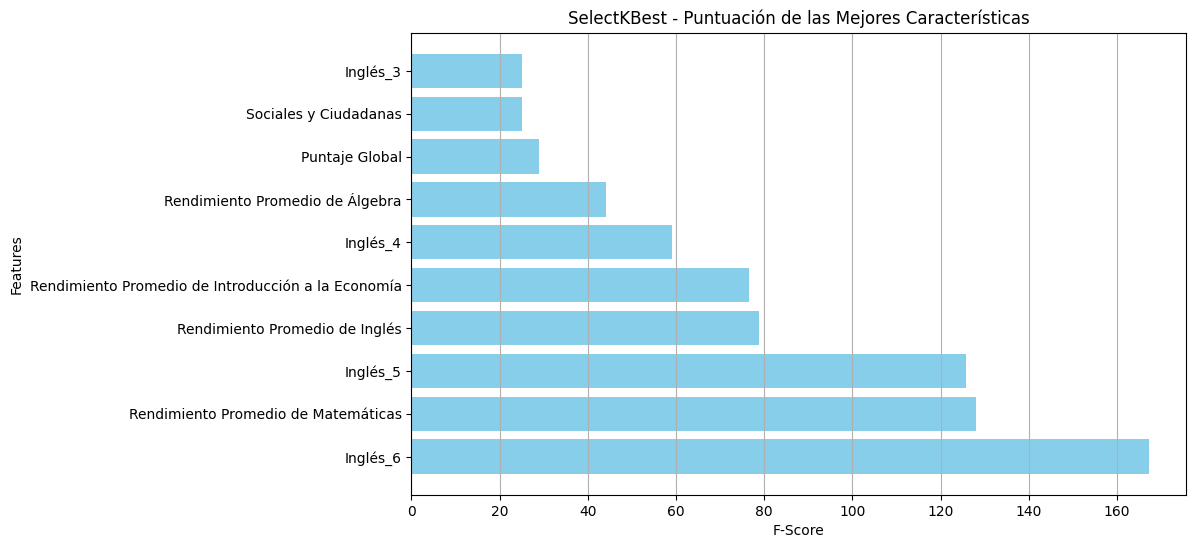

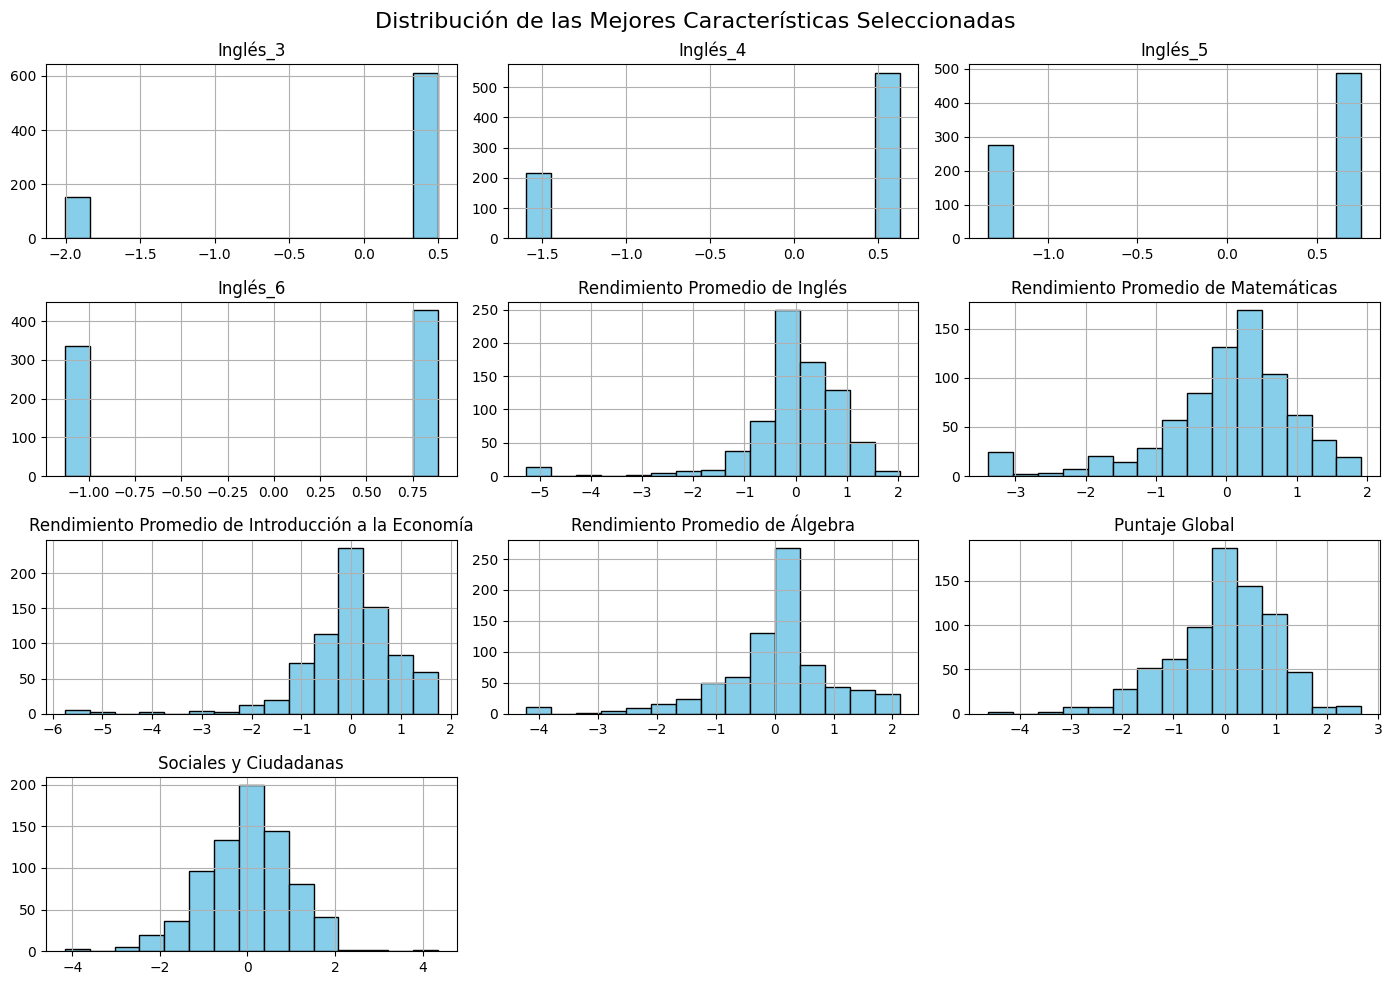


Número óptimo de componentes para explicar al menos el 80% de la varianza: 11


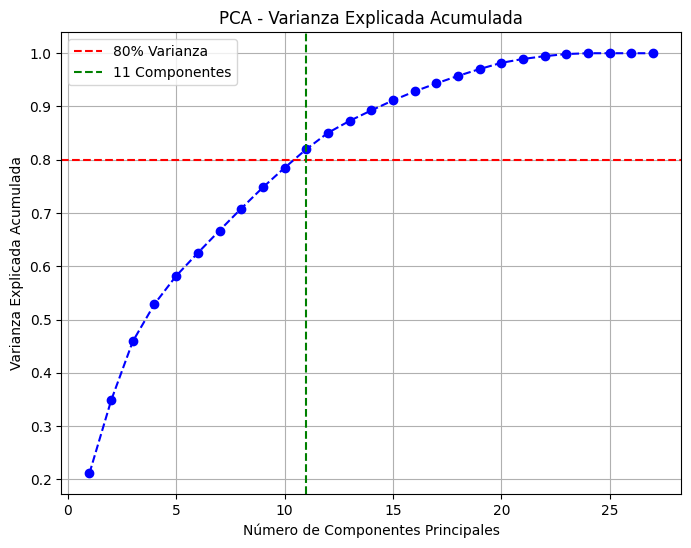

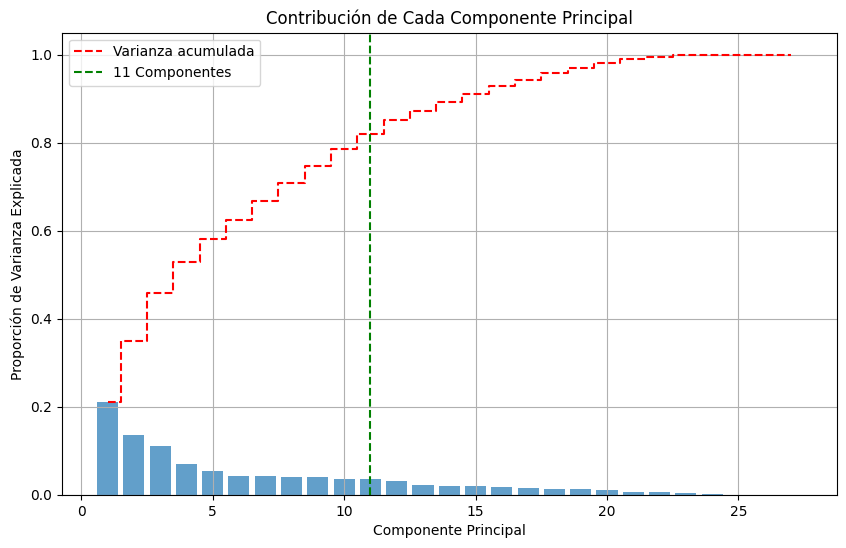

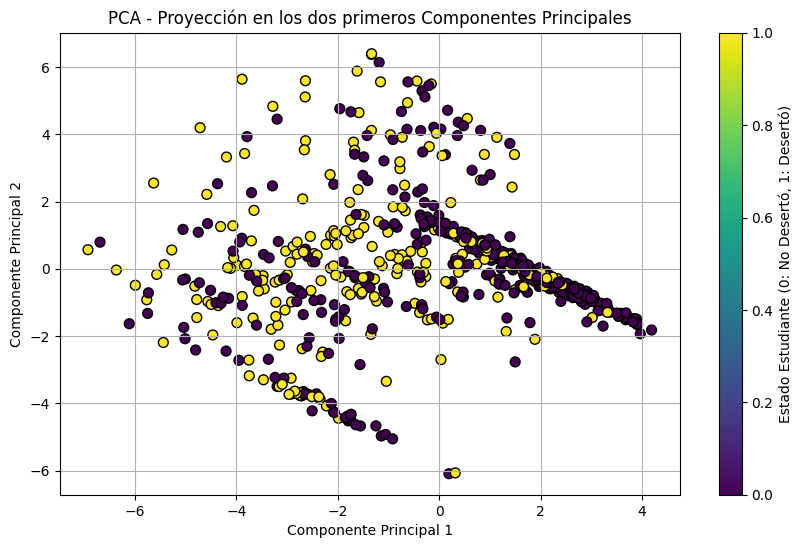

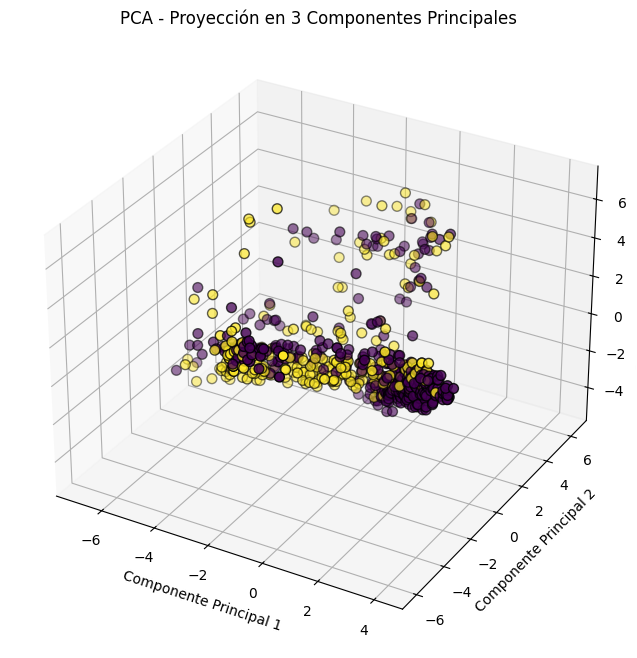


--- Revisión de Clases Antes de Rebalanceo ---
Counter({0: 511, 1: 253})

--- Revisión de Clases Después de Rebalanceo (SMOTE) ---
Counter({0: 511, 1: 511})


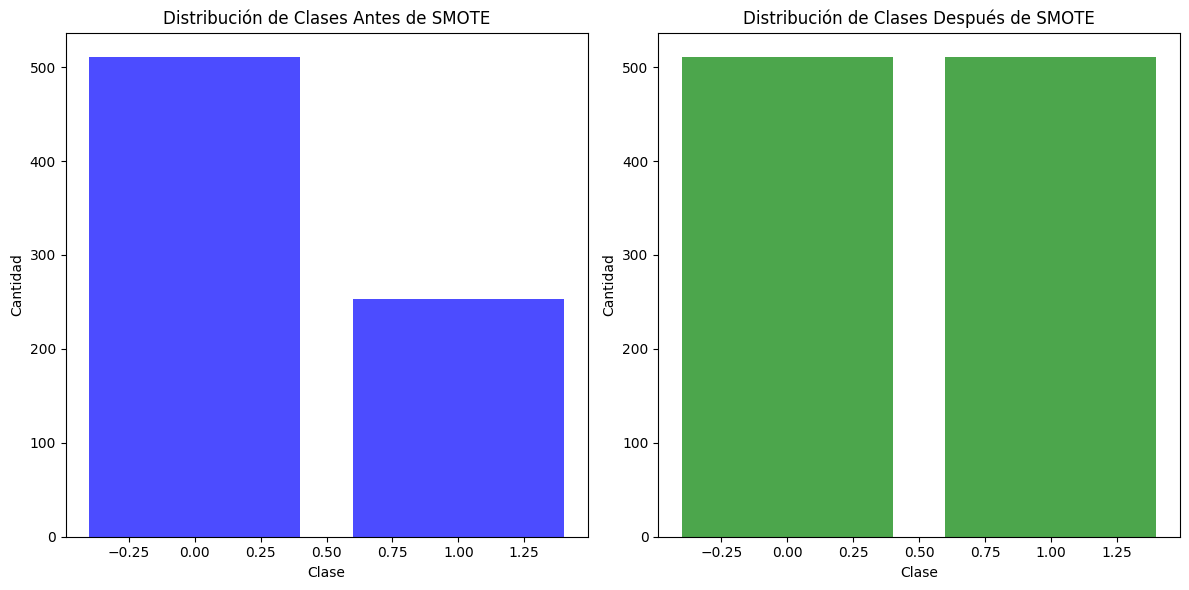

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'], errors='ignore')  #  IGNORAREMOS la variable objetivo de las características
X_numeric = X.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# SelectKBest 

# Seleccionar las mejores características usando F-Score
select_kbest = SelectKBest(score_func=f_classif, k=10)
X_kbest = select_kbest.fit_transform(X_scaled, y)

# Tabla con las características seleccionadas y sus F-Scores
selected_features = X_numeric.columns[select_kbest.get_support()]
feature_scores = select_kbest.scores_[select_kbest.get_support()]
selectkbest_table = pd.DataFrame({'Feature': selected_features, 'F-Score': feature_scores})
selectkbest_table = selectkbest_table.sort_values(by='F-Score', ascending=False)
print("\nSelectKBest: Mejores Características ---")
print(selectkbest_table)

#  PCA  determinar cuántos explican el 70%-80% de la varianza
pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\nNúmero óptimo de componentes para explicar al menos el 80% de la varianza: {optimal_components}")

# Ajustar PCA al número óptimo de componentes
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_scaled)

# varianza explicada acumulada -> interpretabilidad 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% Varianza")
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f"{optimal_components} Componentes")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("PCA - Varianza Explicada Acumulada")
plt.legend()
plt.grid()
plt.show()

# Rebalanceo de Clases
# Verificar el desbalance de clases
print("\n Revisión de Clases Antes de Rebalanceo")
print(Counter(y))

# Aplicar SMOTE para rebalancear las clases ->  ESTO ES UN REBALANCEO PREVIO Y DESCRIPTIVO!
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verificar el balance de clases después del rebalanceo
print("\n Revisión de Clases Después de Rebalanceo (SMOTE) ---")
print(Counter(y_resampled))

# características seleccionadas por SelectKBest
plt.figure(figsize=(10, 6))
plt.barh(selectkbest_table['Feature'], selectkbest_table['F-Score'], color='skyblue')
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.title("SelectKBest - Puntuación de las Mejores Características")
plt.grid(axis='x')
plt.show()

# componentes principales (PCA)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Proyección en los dos primeros Componentes Principales")
plt.colorbar(label='Estado Estudiante (0: No Desertó, 1: Desertó)')
plt.grid()
plt.show()



Podemos observar, en primer lugar, que los niveles de inglés a partir del 3, califican entre las 10 variables con mayor F-Score. Esto significa que las materias de inglés son bastante importantes a la hora de explicar la deserción o permanencia de un estudiante en el programa.
Por otro lado, observamos que el nivel de inglés 6 y el rendimiento en matemáticas son variables importantes a la hora de explicar si los estudiantes desertan o no.

In [ ]:
pip install imbalanced-learn


En este código, por otro lado, se hace el mismo análisis, eliminando las materias de inglés de éste, para observar qué otras variables influyen.

C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



--- SelectKBest (Sin Inglés): Mejores Características ---
                                             Feature     F-Score
3                Rendimiento Promedio de Matemáticas  128.090886
2                     Rendimiento Promedio de Inglés   78.715278
4  Rendimiento Promedio de Introducción a la Econ...   76.456930
5                    Rendimiento Promedio de Álgebra   44.026338
6                                     Puntaje Global   28.900551
9                              Sociales y Ciudadanas   25.166943
8                                        Matemáticas   22.505483
1                         Distancia_a_Universidad_km   14.762075
0                                     Perdio_Algebra   14.260833
7                                    Lectura Crítica   13.002383


<Figure size 1400x1000 with 0 Axes>

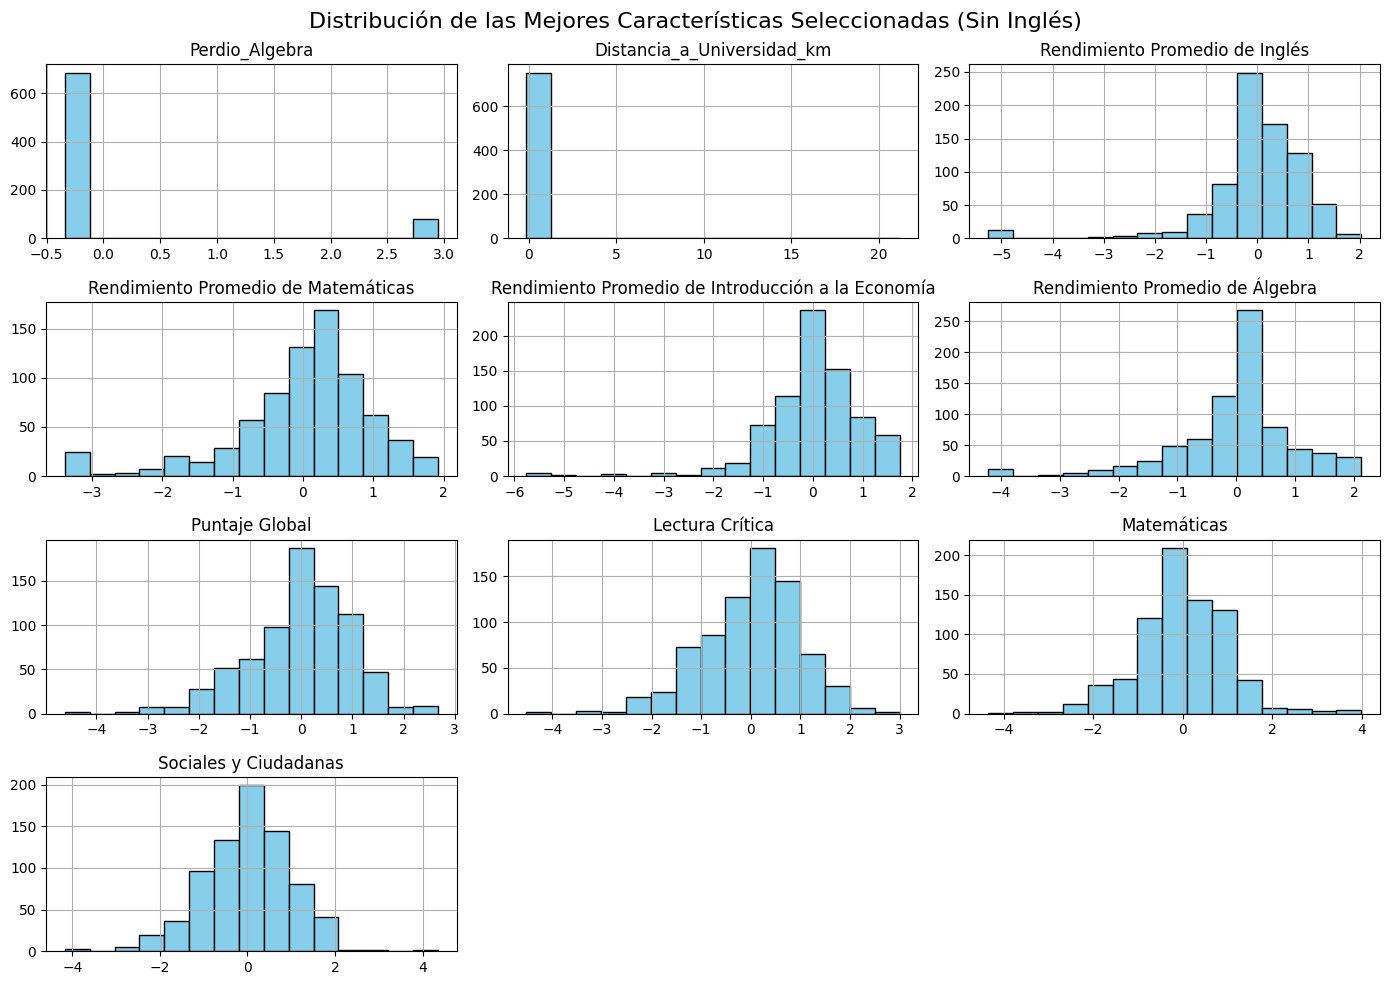

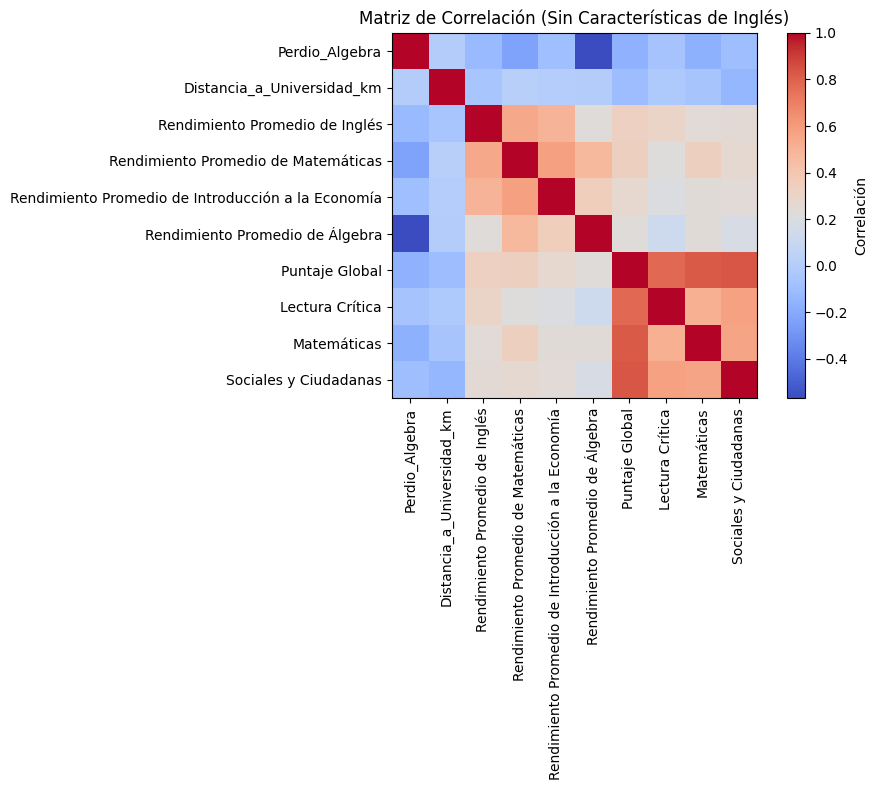

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde tu archivo
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'], errors='ignore')  # Eliminar la variable objetivo de las características

# Seleccionar solo las columnas numéricas para el análisis
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Remover las características relacionadas con los niveles de Inglés
features_to_exclude = ['Inglés_2','Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']
X_no_ingles = X_numeric.drop(columns=features_to_exclude, errors='ignore')

# Escalamiento de las características restantes
scaler = StandardScaler()
X_scaled_no_ingles = scaler.fit_transform(X_no_ingles)

# ---- SelectKBest sin características de inglés ----
select_kbest_no_ingles = SelectKBest(score_func=f_classif, k=10)
X_kbest_no_ingles = select_kbest_no_ingles.fit_transform(X_scaled_no_ingles, y)

# Crear una tabla con las características seleccionadas y sus F-Scores (sin inglés)
selected_features_no_ingles = X_no_ingles.columns[select_kbest_no_ingles.get_support()]
feature_scores_no_ingles = select_kbest_no_ingles.scores_[select_kbest_no_ingles.get_support()]
selectkbest_table_no_ingles = pd.DataFrame({
    'Feature': selected_features_no_ingles, 
    'F-Score': feature_scores_no_ingles
}).sort_values(by='F-Score', ascending=False)

# Mostrar los resultados sin inglés
print("\n--- SelectKBest (Sin Inglés): Mejores Características ---")
print(selectkbest_table_no_ingles)

# ---- Graficar las características seleccionadas sin inglés ----
X_kbest_no_ingles_df = pd.DataFrame(X_kbest_no_ingles, columns=selected_features_no_ingles)

# Histograma de las mejores características seleccionadas
plt.figure(figsize=(14, 10))
X_kbest_no_ingles_df.hist(bins=15, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las Mejores Características Seleccionadas (Sin Inglés)", fontsize=16)
plt.tight_layout()
plt.show()

# Matriz de correlación de las características seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix_no_ingles = X_kbest_no_ingles_df.corr()
plt.imshow(correlation_matrix_no_ingles, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlación')
plt.xticks(range(len(selected_features_no_ingles)), selected_features_no_ingles, rotation=90)
plt.yticks(range(len(selected_features_no_ingles)), selected_features_no_ingles)
plt.title("Matriz de Correlación (Sin Características de Inglés)")
plt.tight_layout()
plt.show()


Observamos, con base a lo anterior, que, al eliminar inglés del análisis del F-Score, aparecen los puntajes de Saber 11 como factores relevantes, así como la distancia a la universidad. También es relevante álgebra lineal.

# Corremos el modelo:

Ahora bien, desarrollamos el modelo, distinguiendo los grupos de entrenamiento y prueba, y le solicitamos que nos muestre las dimensiones finales de los conjuntos. Posteriormente, se verifica la distribución antes de balancear el modelo y después de balancear.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Cargar la base de datos procesada
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'], errors='ignore')  # Eliminar la variable objetivo de las características

# Dividir los datos en conjuntos de entrenamiento y prueba (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar la distribución de clases antes del rebalanceo en el conjunto de entrenamiento
print("\n--- Distribución de Clases Antes del Rebalanceo (Entrenamiento) ---")
print(Counter(y_train))

# Aplicar rebalanceo con undersampling en el conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del rebalanceo
print("\n--- Distribución de Clases Después del Rebalanceo (Undersampling) ---")
print(Counter(y_train_balanced))

# Mostrar las dimensiones finales de los conjuntos
print("\n--- Dimensiones de los Conjuntos ---")
print(f"X_train_balanced: {X_train_balanced.shape}, y_train_balanced: {y_train_balanced.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



--- Distribución de Clases Antes del Rebalanceo (Entrenamiento) ---
Counter({0: 357, 1: 177})

--- Distribución de Clases Después del Rebalanceo (Undersampling) ---
Counter({0: 177, 1: 177})

--- Dimensiones de los Conjuntos ---
X_train_balanced: (354, 37), y_train_balanced: (354,)
X_test: (230, 37), y_test: (230,)


La siguiente linea de código expone qué columnas se utilizarán para el modelo, de nuevo escogemos el grupo de entrenamiento y de testeoy verificamos los datos antes y después del balance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Cargar la base de datos procesada
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Columnas a excluir
columns_to_exclude = ['Nombre Colegio', 'Aproximad Periodo Academico', 
                      'Numero materias Periodo', 'Numero credito de la materia']

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'] + columns_to_exclude, errors='ignore')  # Eliminar variable objetivo y columnas excluidas

# Mostrar las columnas que se están utilizando
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n--- Características Numéricas ---")
print(numeric_features)

print("\n--- Características Categóricas ---")
print(categorical_features)

print(f"\nTotal de características utilizadas: {len(numeric_features) + len(categorical_features)}")

# Dividir los datos en conjuntos de entrenamiento y prueba (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar la distribución de clases antes del rebalanceo en el conjunto de entrenamiento
print("\n--- Distribución de Clases Antes del Rebalanceo (Entrenamiento) ---")
print(Counter(y_train))

# Aplicar rebalanceo con undersampling en el conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del rebalanceo
print("\n--- Distribución de Clases Después del Rebalanceo (Undersampling) ---")
print(Counter(y_train_balanced))

# Mostrar las dimensiones finales de los conjuntos
print("\n--- Dimensiones de los Conjuntos ---")
print(f"X_train_balanced: {X_train_balanced.shape}, y_train_balanced: {y_train_balanced.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



--- Características Numéricas ---
['Año Academico', 'Periodo Academico', 'Numero credito de la materia)', 'Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6', 'Perdio_Algebra', 'Perdio_Introduccion_Economia', 'Perdio_Matematicas_1', 'Perdio_Matematicas_2', 'Perdio_Matematicas_3', 'Promedio Total Colegio', 'ipm', 'Distancia_a_Universidad_km', 'Rendimiento Promedio de Inglés', 'Rendimiento Promedio de Matemáticas', 'Rendimiento Promedio de Introducción a la Economía', 'Rendimiento Promedio de Álgebra', 'Puntaje Global', 'Lectura Crítica', 'Matemáticas', 'Sociales y Ciudadanas', 'Edad Inicio Universidad']

--- Características Categóricas ---
['Ciudad de Correspondencia2', 'Departamento Nacimiento2', 'Ciudad Nacimiento2', 'Sexo', 'Clase Oyente', 'Grupo étnico', 'Nombre Colegio Aproximado', 'Clasificación IPM']

Total de características utilizadas: 34

--- Distribución de Clases Antes del Rebalanceo (Entrenamiento) ---
Counter({0: 357, 1: 177})

--- Distribución de Clase

# Modelos Logit desarrollados

Con el siguiente código corremos el modelo logit, el model logit con polinomios y logit con regularización. Los hiperparámetros se optimizaron para reducir el tiempo de búsqueda. Se mantiene la regularización de l1 y l2, con polinomios de grado 2 y un rango limitado para C. Finalmente, realizamos matrices de confusión.


--- i. Regresión Logística Básica ---
Mejores Hiperparámetros: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       154
           1       0.56      0.67      0.61        76

    accuracy                           0.72       230
   macro avg       0.69      0.71      0.69       230
weighted avg       0.73      0.72      0.72       230



C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



--- ii. Regresión Logística con Polinomios (Optimizado) ---
Mejores Hiperparámetros: {'poly__degree': 2, 'classifier__penalty': 'l1', 'classifier__C': 1}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       154
           1       0.64      0.68      0.66        76

    accuracy                           0.77       230
   macro avg       0.74      0.75      0.74       230
weighted avg       0.77      0.77      0.77       230


--- iii. Regresión Logística con Regularización ---
Mejores Hiperparámetros: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       154
           1       0.51      0.62      0.56        76

    accuracy                           0.67       230
   macro avg       0.65      0.66      0.65       230
weighted avg       0.69      0.67      0.68       230


--- Matriz de Con

C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


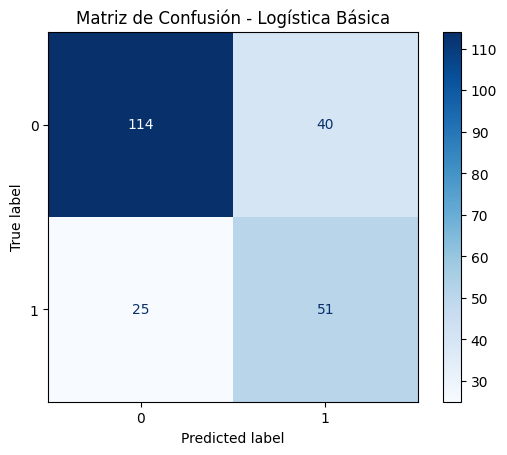


--- Matriz de Confusión: Regresión Logística Con Polinomios ---


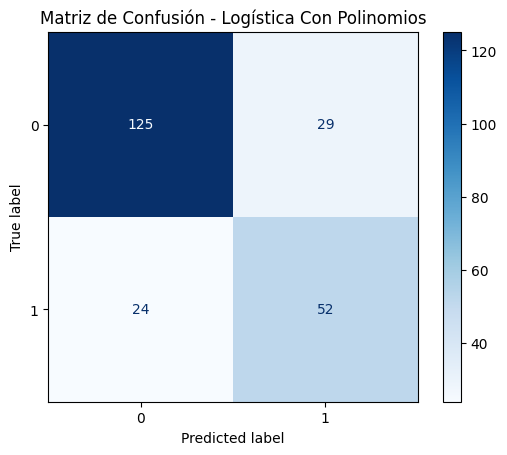


--- Matriz de Confusión: Regresión Logística Con Regularización ---


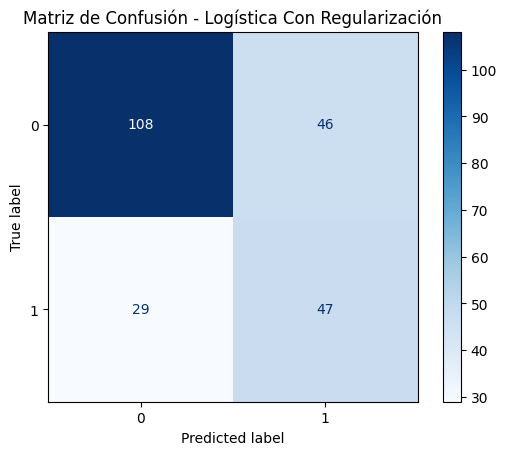

In [ ]:
# Verifica que los módulos necesarios están instalados
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
    from sklearn.compose import ColumnTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    from imblearn.under_sampling import RandomUnderSampler
    from scipy.stats import uniform
except ImportError as e:
    print(f"Falta instalar un paquete necesario: {e}.")
    print("Instala los paquetes faltantes con: pip install pandas matplotlib scikit-learn imbalanced-learn scipy")
    exit()

# Cargar la base de datos
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Ajustar columnas a excluir
columns_to_exclude = ['Nombre Colegio Aproximado', 'Numero materias Periodo', 'Numero credito de la materia',
                      'Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante'] if 'Estado Estudiante' in data.columns else data.iloc[:, -1]
X = data.drop(columns=['Estado Estudiante'] + columns_to_exclude, errors='ignore')

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Crear transformadores para características numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar undersampling con imblearn
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# ---- i. Regresión Logística Básica ----
logistic_basic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_basic = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

grid_basic = GridSearchCV(logistic_basic, param_grid_basic, cv=5, scoring='precision', n_jobs=-1)
grid_basic.fit(X_train_balanced, y_train_balanced)

# Evaluar modelo básico
print("\n--- i. Regresión Logística Básica ---")
print("Mejores Hiperparámetros:", grid_basic.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_basic.predict(X_test)))

# ---- ii. Regresión Logística con Polinomios ----
logistic_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),  # Limitar a grado 2 para reducir el tiempo
    ('classifier', LogisticRegression(max_iter=500, random_state=42, solver='saga'))  # Solver saga soporta l1 y l2
])

# Hiperparámetros optimizados para reducir tiempo de búsqueda
param_dist_poly = {
    'poly__degree': [2],  # Fijado a 2 para reducir combinaciones
    'classifier__C': [0.1, 1, 10],  # Rango más limitado para C
    'classifier__penalty': ['l1', 'l2']  # Manteniendo ambas opciones de regularización
}

# Reducción de n_iter en RandomizedSearchCV para disminuir tiempo
random_poly = RandomizedSearchCV(logistic_poly, param_dist_poly, n_iter=10, cv=3, scoring='precision', n_jobs=-1, random_state=42)
random_poly.fit(X_train_balanced, y_train_balanced)

# Evaluar modelo con polinomios optimizado
print("\n--- ii. Regresión Logística con Polinomios (Optimizado) ---")
print("Mejores Hiperparámetros:", random_poly.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, random_poly.predict(X_test)))
# ---- iii. Regresión Logística con Regularización ----
logistic_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000, random_state=42))
])

param_grid_reg = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

grid_reg = GridSearchCV(logistic_reg, param_grid_reg, cv=5, scoring='precision', n_jobs=-1)
grid_reg.fit(X_train_balanced, y_train_balanced)

# Evaluar modelo con regularización
print("\n--- iii. Regresión Logística con Regularización ---")
print("Mejores Hiperparámetros:", grid_reg.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_reg.predict(X_test)))

# ---- Visualización de Matrices de Confusión ----
for name, grid in zip(
    ['Básica', 'Con Polinomios', 'Con Regularización'],
    [grid_basic, random_poly, grid_reg]
):
    print(f"\n--- Matriz de Confusión: Regresión Logística {name} ---")
    ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap='Blues')
    plt.title(f"Matriz de Confusión - Logística {name}")
    plt.show()



Con base a lo anterior, observamos que el modelo que mejor precision y recall nos arroja es el modelo de polinomios. por otro lado, observamos que la cantidad de desertores no predichos por el modelo es mínimo también en la logit con polinomios.

En la siguiente linea de código, excluimos las variables relacionadas con inglés y corremos los modelos Elastic Net, KNN, AdaBoost y Bagging, y exponemos las matrices de confusión.

Tamaño del conjunto de entrenamiento después del balanceo: (714, 870)
Tamaño del conjunto de prueba: (230, 870)


C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



--- Elastic Net ---
Mejores Hiperparámetros: {'C': 10, 'l1_ratio': 0.9, 'penalty': 'elasticnet'}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       154
           1       0.53      0.54      0.53        76

    accuracy                           0.69       230
   macro avg       0.65      0.65      0.65       230
weighted avg       0.69      0.69      0.69       230


--- KNN ---
Mejores Hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       154
           1       0.47      0.71      0.57        76

    accuracy                           0.64       230
   macro avg       0.64      0.66      0.63       230
weighted avg       0.70      0.64      0.65       230



C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- AdaBoost ---
Mejores Hiperparámetros: {'learning_rate': 1, 'n_estimators': 100}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       154
           1       0.76      0.71      0.73        76

    accuracy                           0.83       230
   macro avg       0.81      0.80      0.81       230
weighted avg       0.83      0.83      0.83       230


--- Bagging ---
Mejores Hiperparámetros: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 100}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       154
           1       0.76      0.80      0.78        76

    accuracy                           0.85       230
   macro avg       0.83      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230


--- Matriz de Confusión: Elastic Net ---


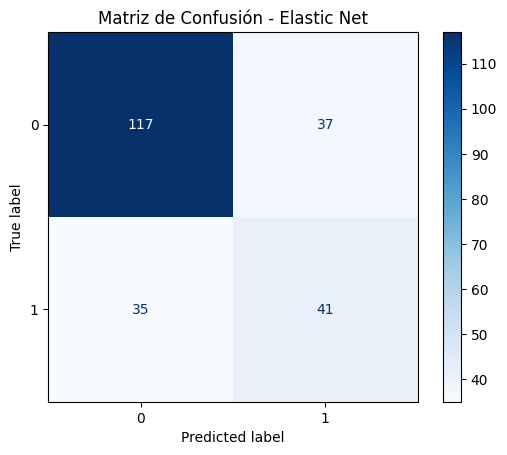


--- Matriz de Confusión: KNN ---


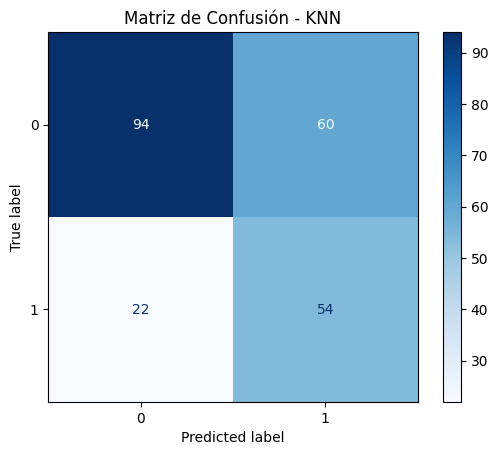


--- Matriz de Confusión: AdaBoost ---


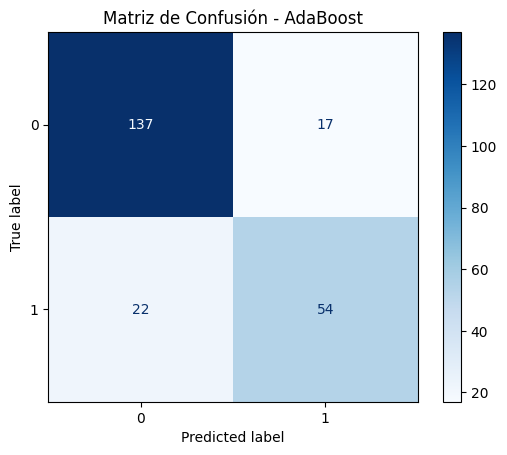


--- Matriz de Confusión: Bagging ---


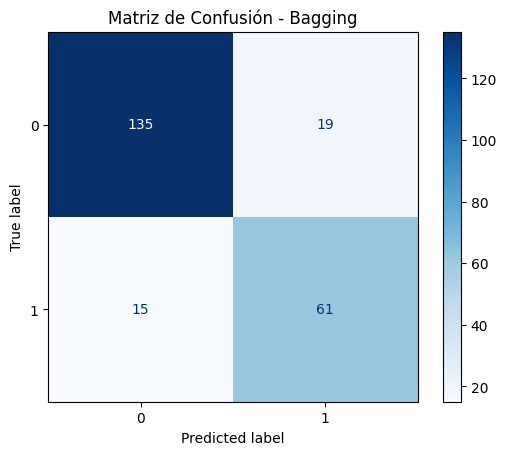

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar la base de datos procesada
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Eliminar espacios adicionales en los nombres de las columnas
data.columns = data.columns.str.strip()

# Excluir variables relacionadas con inglés
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'] + columns_to_exclude, errors='ignore')  # Eliminar la variable objetivo y columnas excluidas

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Crear transformadores para características numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocesar los datos antes de aplicar SMOTE
X_processed = preprocessor.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para rebalancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Confirmar formas de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento después del balanceo: {X_train_balanced.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# ---- i. Elastic Net ----
elastic_net = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
param_grid_elastic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid_elastic = GridSearchCV(elastic_net, param_grid_elastic, cv=5, scoring='accuracy', n_jobs=-1)
grid_elastic.fit(X_train_balanced, y_train_balanced)

print("\n--- Elastic Net ---")
print("Mejores Hiperparámetros:", grid_elastic.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_elastic.predict(X_test)))

# ---- ii. KNN ----
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_balanced, y_train_balanced)

print("\n--- KNN ---")
print("Mejores Hiperparámetros:", grid_knn.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_knn.predict(X_test)))

# ---- iii. AdaBoost ----
adaboost = AdaBoostClassifier(random_state=42)
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1)
grid_adaboost.fit(X_train_balanced, y_train_balanced)

print("\n--- AdaBoost ---")
print("Mejores Hiperparámetros:", grid_adaboost.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_adaboost.predict(X_test)))

# ---- iv. Bagging ----
bagging = BaggingClassifier(random_state=42)
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}
grid_bagging = GridSearchCV(bagging, param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)
grid_bagging.fit(X_train_balanced, y_train_balanced)

print("\n--- Bagging ---")
print("Mejores Hiperparámetros:", grid_bagging.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_bagging.predict(X_test)))

# ---- Visualización de Matrices de Confusión ----
for name, grid in zip(
    ['Elastic Net', 'KNN', 'AdaBoost', 'Bagging'],
    [grid_elastic, grid_knn, grid_adaboost, grid_bagging]
):
    print(f"\n--- Matriz de Confusión: {name} ---")
    ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()



Observamos, con base a lo anterior, que los mejores modelos, en términos de precision, recall y de la matriz de confusión, son los modelos de AdaBoost y de Bagging.

A continuación, corremos el modelo de Random Forest sin inglés incluido.

In [ ]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Cargar la base de datos procesada
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Eliminar espacios adicionales en los nombres de las columnas
data.columns = data.columns.str.strip()

# Excluir variables relacionadas con inglés
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Separar características (X) y variable objetivo (y)
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'] + columns_to_exclude, errors='ignore')  # Eliminar columnas de inglés y objetivo

# Convertir columnas de tipo datetime a strings o eliminarlas si no son relevantes
datetime_columns = X.select_dtypes(include=['datetime']).columns
X[datetime_columns] = X[datetime_columns].astype(str)

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Imputar valores faltantes para numéricas y categóricas
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())  # Media para numéricas
X[categorical_features] = X[categorical_features].fillna('missing')  # "missing" para categóricas

# Convertir las características categóricas en variables dummy
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para rebalancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ---- Modelo Random Forest ----
random_forest = RandomForestClassifier(random_state=42)

# Definir espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras en las hojas
}

# Configurar GridSearchCV
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf.fit(X_train_resampled, y_train_resampled)

# Evaluar el modelo en el conjunto de prueba
print("\n--- Random Forest Sin Inglés ---")
print("Mejores Hiperparámetros:", grid_rf.best_params_)
print("Resultados en Prueba:")
print(classification_report(y_test, grid_rf.predict(X_test)))





Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- Random Forest Sin Inglés ---
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Resultados en Prueba:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       154
           1       0.76      0.55      0.64        76

    accuracy                           0.80       230
   macro avg       0.78      0.73      0.75       230
weighted avg       0.79      0.80      0.79       230



In [ ]:
pip install xgboost imbalanced-learn


In [ ]:
pip install xgboost imbalanced-learn

A continuación, corremos los modelos de Boosting y de Árboles de decisión.

In [ ]:
# ---- Modelos Adicionales: Boosting y Árboles de Decisión ----

# 1. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
gb_preds = gb_model.predict(X_test)
print("\n--- Gradient Boosting ---")
print(classification_report(y_test, gb_preds))

# 2. AdaBoost
ada_model = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)
ada_model.fit(X_train_resampled, y_train_resampled)
ada_preds = ada_model.predict(X_test)
print("\n--- AdaBoost ---")
print(classification_report(y_test, ada_preds))

# 3. XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test)
print("\n--- XGBoost ---")
print(classification_report(y_test, xgb_preds))

# 4. Árboles de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_preds = dt_model.predict(X_test)
print("\n--- Árboles de Decisión ---")
print(classification_report(y_test, dt_preds))



--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       154
           1       0.78      0.78      0.78        76

    accuracy                           0.85       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.85      0.85      0.85       230



C:\Users\dorju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- AdaBoost ---
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.76      0.72      0.74        76

    accuracy                           0.83       230
   macro avg       0.82      0.81      0.81       230
weighted avg       0.83      0.83      0.83       230


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.78      0.83      0.80        76

    accuracy                           0.87       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.87      0.87      0.87       230


--- Árboles de Decisión ---
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       154
           1       0.75      0.78      0.76        76

    accuracy                           0.84       230
   macro avg       0.82      0.82      0.82       230
weighted a

Observamos que el modelo de árbol de decision y de XGBoost muestran buenos resultados, en lo que respecta a la precision y al recall.

A continuación, corremos el modelo de árboles de decision: SVM con kernel lineal, con kernel RBF o con kernel polinomial.

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

def display_metrics(y_true, y_pred, model_name):
    """Función para mostrar métricas clave en formato de tabla."""
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()
    metrics_df = metrics_df[['precision', 'recall', 'f1-score', 'support']]  # Seleccionar columnas clave
    print(f"\n--- {model_name} ---")
    print(metrics_df)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")

# 4. Árboles de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_preds = dt_model.predict(X_test)
display_metrics(y_test, dt_preds, "Árboles de Decisión")

# ---- Máquinas de Soporte Vectorial (SVM) ----

# 1. SVM con kernel lineal
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_resampled, y_train_resampled)
svm_linear_preds = svm_linear.predict(X_test)
display_metrics(y_test, svm_linear_preds, "SVM (Kernel Lineal)")

# 2. SVM con kernel RBF (Optimización de hiperparámetros)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_svm_rbf = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_svm,
    cv=3,
    scoring='accuracy',
    verbose=2
)
grid_svm_rbf.fit(X_train_resampled, y_train_resampled)

best_svm_rbf = grid_svm_rbf.best_estimator_
svm_rbf_preds = best_svm_rbf.predict(X_test)

print("\n--- SVM (Kernel RBF - Mejorado) ---")
print(f"Mejores Hiperparámetros: {grid_svm_rbf.best_params_}")
display_metrics(y_test, svm_rbf_preds, "SVM (Kernel RBF - Mejorado)")

# 3. SVM con kernel polinomial
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_resampled, y_train_resampled)
svm_poly_preds = svm_poly.predict(X_test)
display_metrics(y_test, svm_poly_preds, "SVM (Kernel Polinomial)")




--- Árboles de Decisión ---
              precision    recall  f1-score    support
0              0.887417  0.870130  0.878689  154.00000
1              0.746835  0.776316  0.761290   76.00000
accuracy       0.839130  0.839130  0.839130    0.83913
macro avg      0.817126  0.823223  0.819989  230.00000
weighted avg   0.840964  0.839130  0.839896  230.00000
Accuracy: 0.8391


--- SVM (Kernel Lineal) ---
              precision    recall  f1-score     support
0              0.784431  0.850649  0.816199  154.000000
1              0.634921  0.526316  0.575540   76.000000
accuracy       0.743478  0.743478  0.743478    0.743478
macro avg      0.709676  0.688483  0.695869  230.000000
weighted avg   0.735028  0.743478  0.736677  230.000000
Accuracy: 0.7435

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END ........

In [ ]:
pip install shap


In [ ]:
pip uninstall numpy


^C
Note: you may need to restart the kernel to use updated packages.


A continuación, vamos a calcular el AUC-ROC de los modelos y vamos a compararlos entre ellos. Los modelos a comparar serán: Gradient boosting, AdaBoost, XGBoost, Arboles de decisión, SVM kernel lineal, kernel RBF y polinomial.

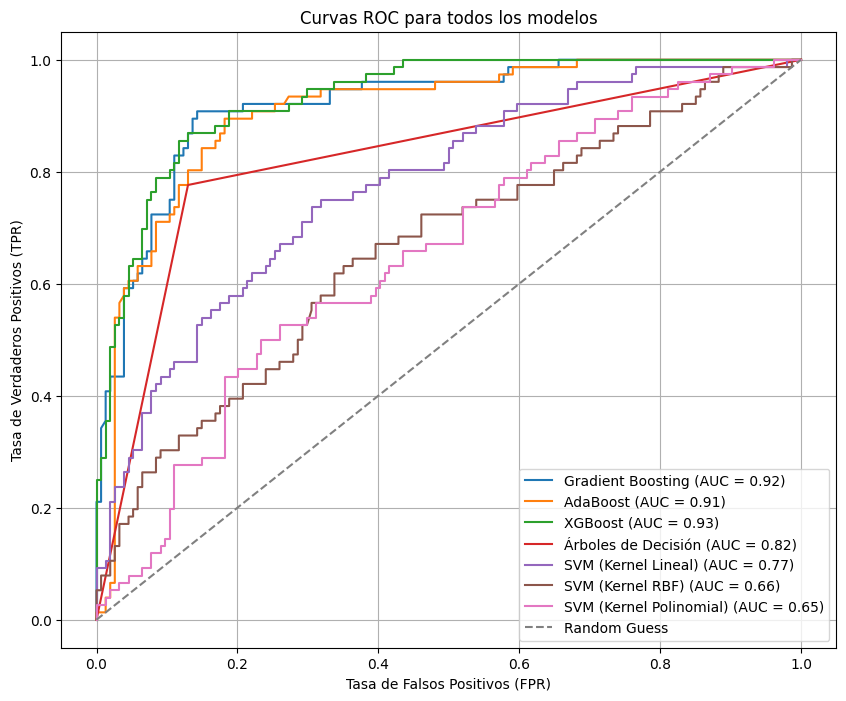


--- Comparación de Métricas ---
                    Modelo  Accuracy   ROC-AUC
2                  XGBoost  0.865217  0.931391
0        Gradient Boosting  0.852174  0.920156
1                 AdaBoost  0.834783  0.905759
3      Árboles de Decisión  0.839130  0.823223
4      SVM (Kernel Lineal)  0.743478  0.774778
5         SVM (Kernel RBF)  0.673913  0.663448
6  SVM (Kernel Polinomial)  0.673913  0.651999


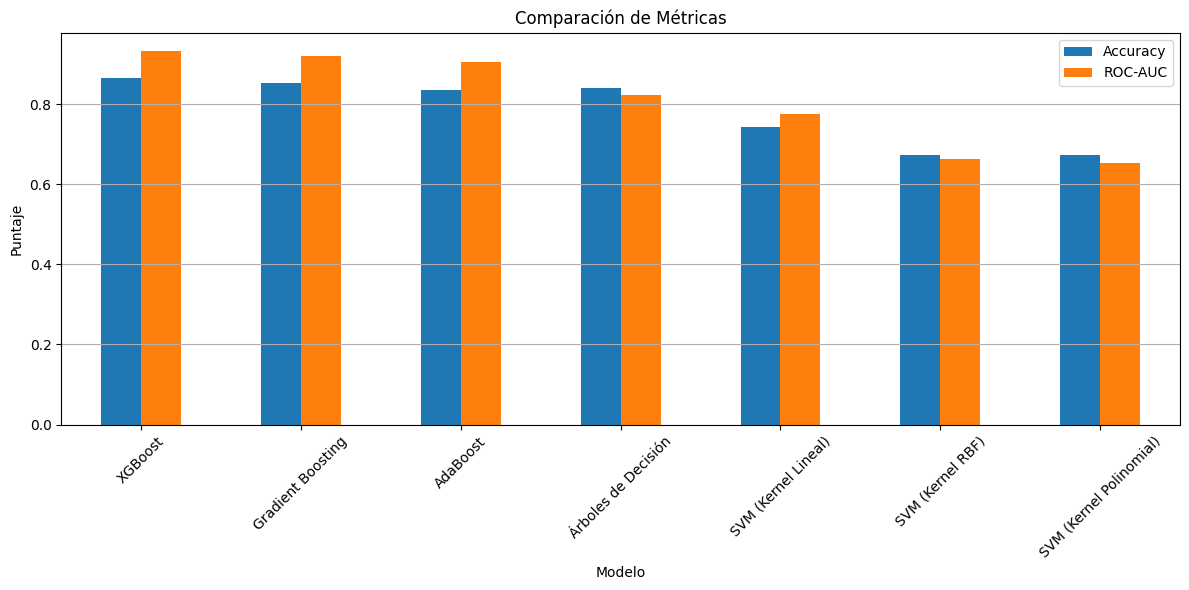

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Crear una lista para almacenar los resultados
model_results = []

# Función para calcular y guardar las métricas
def evaluate_model(name, model, X_test, y_test):
    try:
        # Predicciones
        y_pred = model.predict(X_test)

        # Calcular probabilidades o función de decisión
        if hasattr(model, "predict_proba"):  # Modelos con predict_proba
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # Modelos como SVM
            y_prob = model.decision_function(X_test)
        else:
            raise ValueError(f"El modelo {name} no tiene predict_proba ni decision_function.")

        # Calcular AUC-ROC
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Guardar métricas en la lista
        model_results.append({
            "Modelo": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "ROC-AUC": auc
        })

        # Devolver la curva ROC
        return fpr, tpr, auc
    except Exception as e:
        print(f"Error al evaluar el modelo {name}: {e}")
        return None, None, None

# ---- Comparar Modelos ----
models = {
    "Gradient Boosting": gb_model,
    "AdaBoost": ada_model,
    "XGBoost": xgb_model,
    "Árboles de Decisión": dt_model,
    "SVM (Kernel Lineal)": svm_linear,
    "SVM (Kernel RBF)": best_svm_rbf,
    "SVM (Kernel Polinomial)": svm_poly
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    fpr, tpr, auc = evaluate_model(name, model, X_test, y_test)
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Curva ROC
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.title("Curvas ROC para todos los modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid()
plt.show()

# ---- Comparación de Métricas ----
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(model_results)

# Ordenar los resultados por AUC-ROC
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

# Mostrar la tabla de comparación
print("\n--- Comparación de Métricas ---")
print(results_df)

# Visualización de las métricas
results_df.plot(x="Modelo", y=["Accuracy", "ROC-AUC"], kind="bar", figsize=(12, 6), title="Comparación de Métricas")
plt.ylabel("Puntaje")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observamos, por lo tanto, que los modelos que mejor funcionan, medido bajo la métrica de AUC-ROC, es el XGBoost, Gradient Boosting y AdaBoost, respectivamente.

# Cálculo de diferentes modelos

A continuación, corremos el modelo de árboles de decisión, habiendo eliminado inglés de los datos, balanceado las muestras. Finalmente, graficamos el árbol de decisión y los resultados del modelo.


--- Clasificación con Árboles de Decisión ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       154
           1       0.71      0.72      0.71        76

    accuracy                           0.81       230
   macro avg       0.78      0.79      0.79       230
weighted avg       0.81      0.81      0.81       230



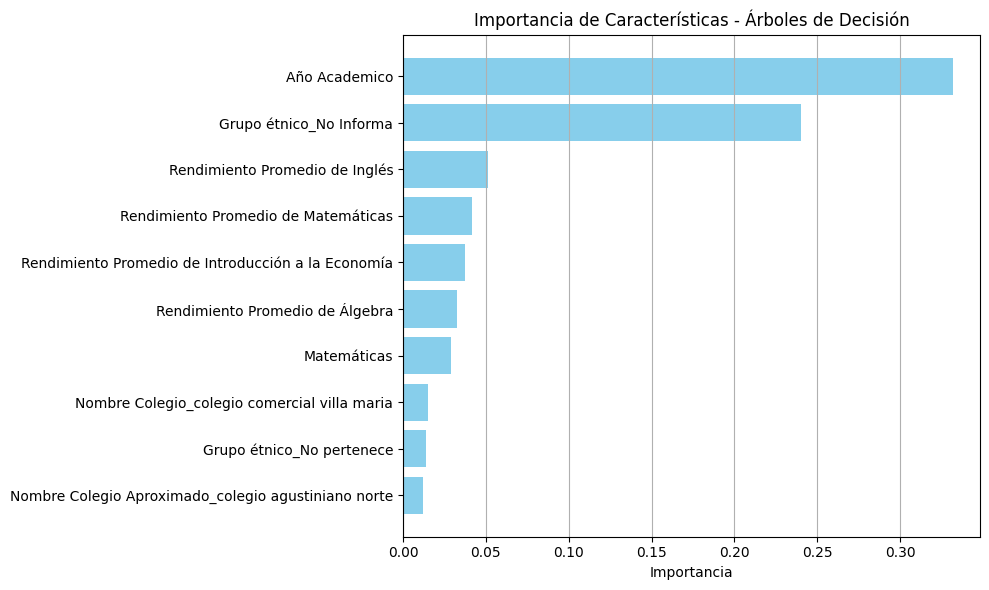

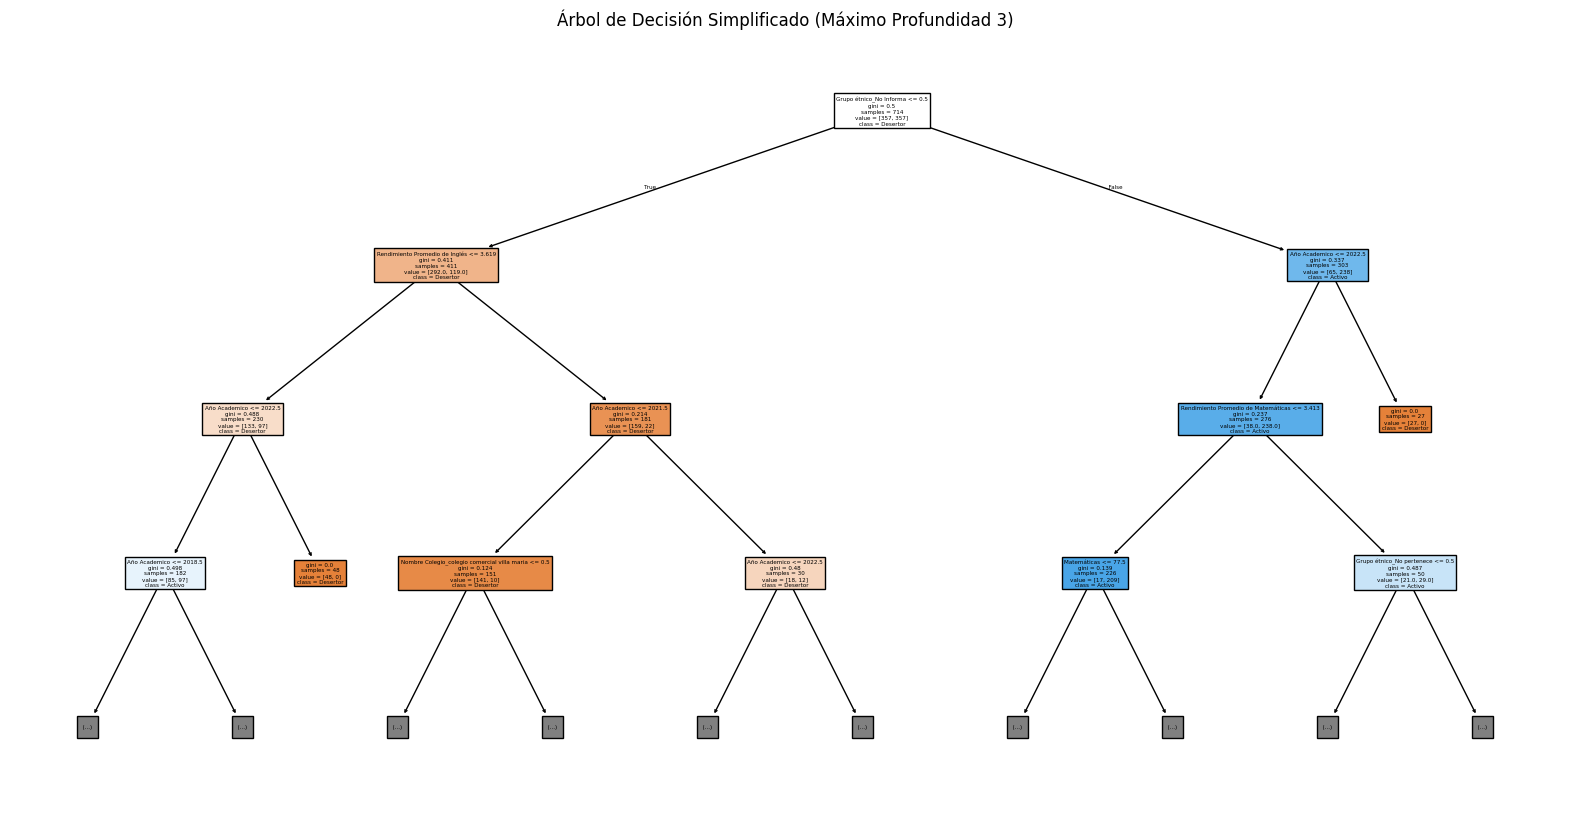

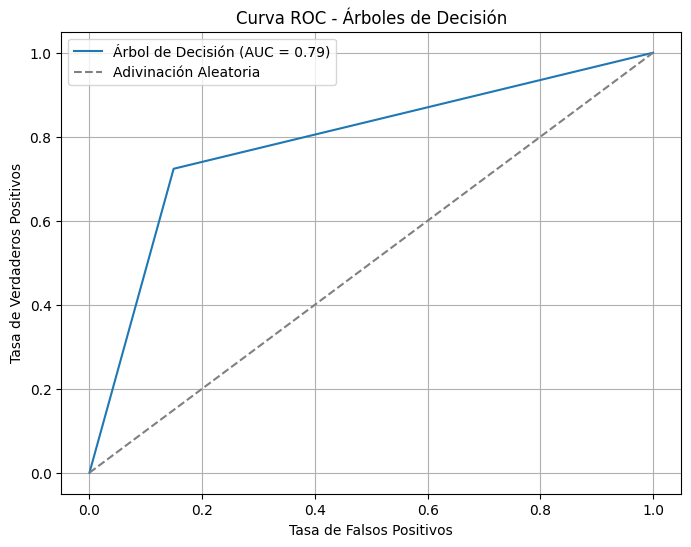

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import shap

# Cargar los datos
file_path =  r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Preprocesamiento
data.columns = data.columns.str.strip()  # Limpiar espacios en los nombres de las columnas
target = 'Estado Estudiante'  # Variable objetivo
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Convertir columnas datetime en valores numéricos
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = pd.to_datetime(data[col]).apply(lambda x: x.year if not pd.isnull(x) else np.nan)

# Separar características (X) y variable objetivo (y)
y = data[target]
X = data.drop(columns=[target] + columns_to_exclude, errors='ignore')

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputar valores faltantes y codificar variables categóricas
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo: Árboles de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predicciones y evaluación
y_pred = dt_model.predict(X_test)
print("\n--- Clasificación con Árboles de Decisión ---")
print(classification_report(y_test, y_pred))

# Gráfica de Importancia de Características
feature_importances = dt_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = X.columns[sorted_indices][:10]  # Seleccionar las 10 más importantes

plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances[sorted_indices][:10], color='skyblue')
plt.title("Importancia de Características - Árboles de Decisión")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfica del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Desertor', 'Activo'], filled=True, max_depth=3)
plt.title("Árbol de Decisión Simplificado (Máximo Profundidad 3)")
plt.show()

# Análisis de curvas ROC
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Árbol de Decisión (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Adivinación Aleatoria")
plt.title("Curva ROC - Árboles de Decisión")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()


Observamos, para este árbol de decisión, un AUC de 0,79, lo cual indica un resultado aceptable. Por otro lado, en la gráfica simplificada del árbol, observamos que el modelo parte de identificar a quienes no informan pertenecer a un grupo étnico específico, para, posteriormente, identificar su nivel de inglés o su año académico.

A continuación, calculamos el modelo a partir del método de Gradient Boosting.


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       154
           1       0.88      0.83      0.85        76

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



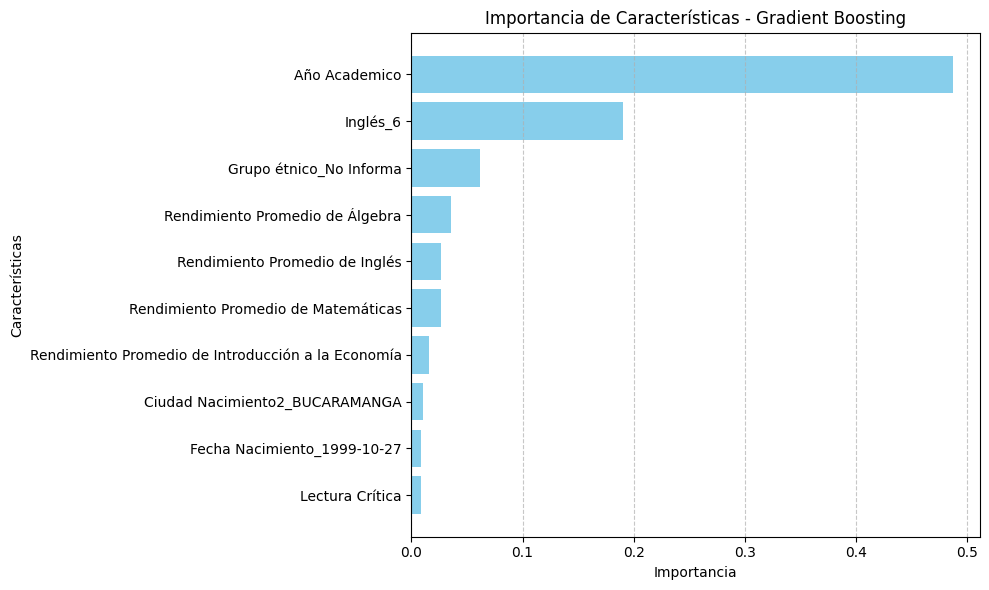

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargar la base de datos
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Eliminar espacios adicionales en los nombres de las columnas
data.columns = data.columns.str.strip()

# Convertir columnas datetime a formato string (o eliminarlas si no son relevantes)
datetime_columns = data.select_dtypes(include=['datetime']).columns
data[datetime_columns] = data[datetime_columns].astype(str)

# Definir la variable objetivo y las características
y = data['Estado Estudiante']  # Variable objetivo
X = data.drop(columns=['Estado Estudiante'], errors='ignore')  # Eliminar la variable objetivo

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocesamiento: Imputar valores faltantes
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())  # Rellenar numéricas con la media
X[categorical_features] = X[categorical_features].fillna('missing')  # Rellenar categóricas con "missing"

# Codificar variables categóricas
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = gb_model.predict(X_test)
print("\n--- Gradient Boosting ---")
print(classification_report(y_test, y_pred))

# Generar la gráfica de importancia de características
importances = gb_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_n = 10
top_features = [feature_names[i] for i in sorted_indices[:top_n]]
top_importances = importances[sorted_indices[:top_n]]

# Generar la gráfica
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances[::-1], color="skyblue", align="center")
plt.yticks(range(len(top_features)), top_features[::-1])
plt.title("Importancia de Características - Gradient Boosting")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


A continuación, hacemos una predicción a partir del modelo de Árbol de decisiones.


--- Clasificación con Árboles de Decisión ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       154
           1       0.71      0.72      0.71        76

    accuracy                           0.81       230
   macro avg       0.78      0.79      0.79       230
weighted avg       0.81      0.81      0.81       230



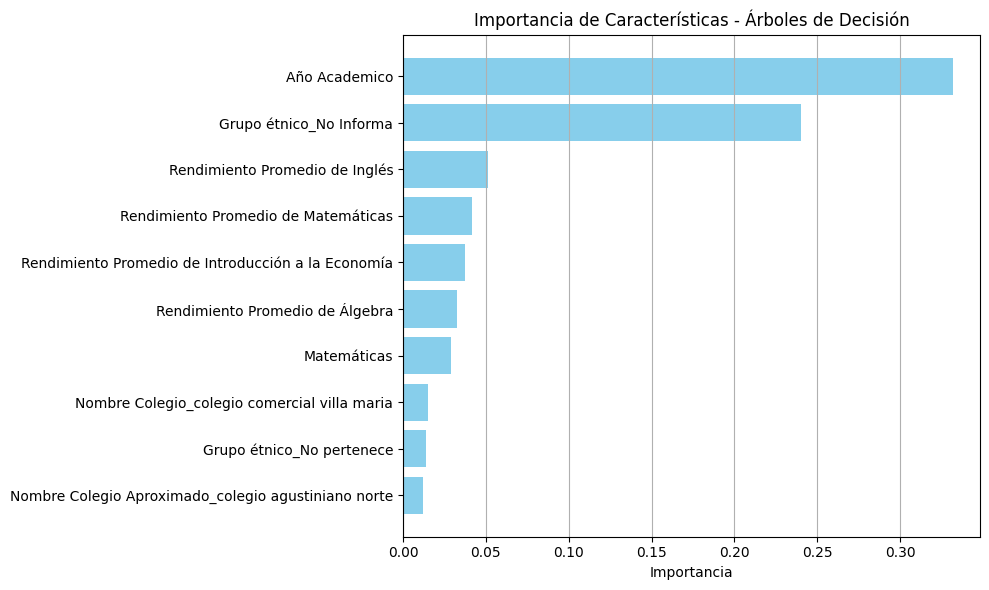

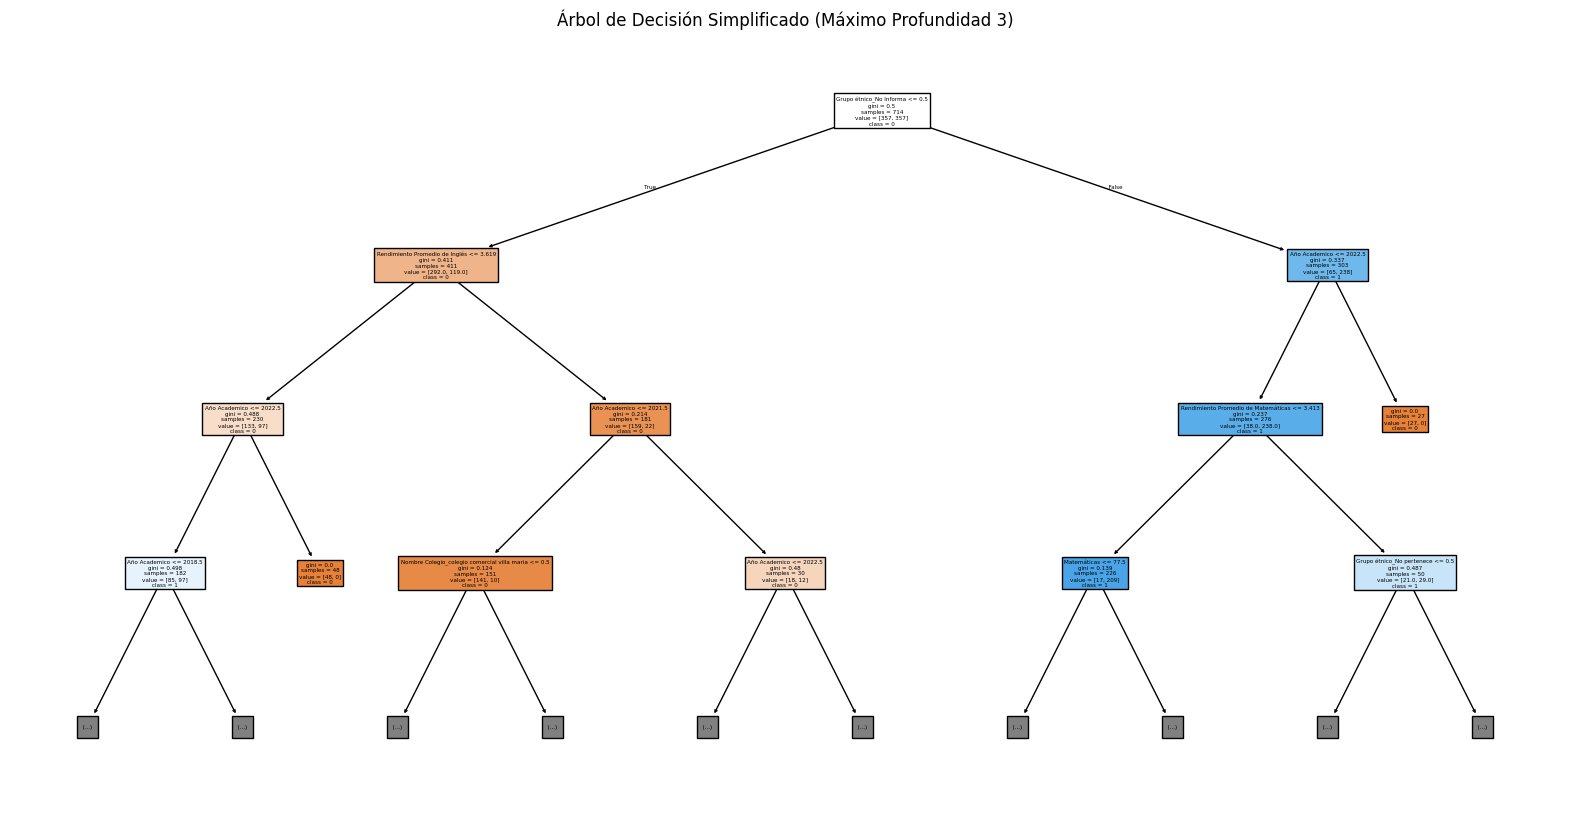

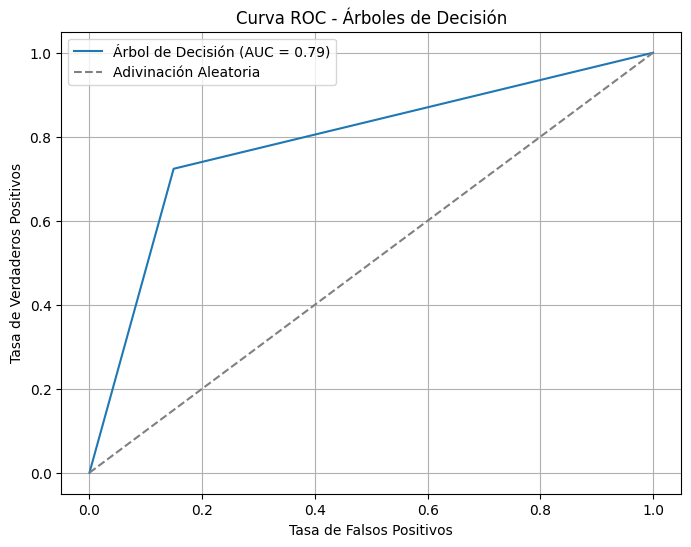


--- Probabilidad de Deserción para Nuevos Datos ---
Estudiante 1: 0.00 (probabilidad de deserción)


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Cargar los datos
file_path = r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Preprocesamiento
data.columns = data.columns.str.strip()  # Limpiar espacios en los nombres de las columnas
target = 'Estado Estudiante'  # Variable objetivo
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Convertir columnas datetime en valores numéricos
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = pd.to_datetime(data[col]).apply(lambda x: x.year if not pd.isnull(x) else np.nan)

# Separar características (X) y variable objetivo (y)
y = data[target]
X = data.drop(columns=[target] + columns_to_exclude, errors='ignore')

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputar valores faltantes y codificar variables categóricas
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo: Árboles de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predicciones y evaluación
y_pred = dt_model.predict(X_test)
print("\n--- Clasificación con Árboles de Decisión ---")
print(classification_report(y_test, y_pred))

# Gráfica de Importancia de Características
feature_importances = dt_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = X.columns[sorted_indices][:10]  # Seleccionar las 10 más importantes

plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances[sorted_indices][:10], color='skyblue')
plt.title("Importancia de Características - Árboles de Decisión")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfica del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, max_depth=3)
plt.title("Árbol de Decisión Simplificado (Máximo Profundidad 3)")
plt.show()

# Análisis de curvas ROC
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Árbol de Decisión (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Adivinación Aleatoria")
plt.title("Curva ROC - Árboles de Decisión")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()



Es importante señalar, con base a lo anterior, la importante significancia del año académico en el modelo. Esto puede deberse a que las condiciones sociales, académicas y económicas de los grupos, según el momento en el que entran a la universidad, influye en su desempeño. Por otro lado, se observa también cómo el desempeño en inglés, en matemáticas o álgebra y en introducción a economía, influye en las probabilidades de deserción. Por otra parte, el desempeño en las pruebas Ssaber 11, sobre todo en Matemáticas, indica que las posibilidades de deserción están correlacionadas con el desempeño en matemáticas en los colegios.

# PRUEBA EN T+1 PARA PREDECIR.

Debido a que deseamos que el modelo prediga si alguien va a desertar, queremos probar el modelo paa t+1.

In [ ]:
# Preprocesamiento
data.columns = data.columns.str.strip()
target = 'Estado Estudiante'
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Convertir columnas datetime en valores numéricos
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = pd.to_datetime(data[col]).apply(lambda x: x.year if not pd.isnull(x) else np.nan)

# Separar características (X) y variable objetivo (y)
y = data[target]
X = data.drop(columns=[target] + columns_to_exclude, errors='ignore')

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputar valores faltantes y codificar variables categóricas
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Evaluar el modelo
y_pred = dt_model.predict(X_test)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# Predicción para nuevos datos
def predecir_desercion(modelo, nuevos_datos, columnas_originales):
    nuevos_datos = pd.get_dummies(nuevos_datos)
    nuevos_datos = nuevos_datos.reindex(columns=columnas_originales, fill_value=0)
    probabilidades = modelo.predict_proba(nuevos_datos)[:, 1]
    return (probabilidades * 100).round(2)

# Datos de ejemplo para predicción
datos_nuevos = pd.DataFrame({
    'Sexo': ['Masculino'],
    'Clase Oyente': [0],
    'Grupo étnico': ['Ninguno'],
    'Perdio_Algebra': [1],
    'Perdio_Introduccion_Economia': [0],
    'Perdio_Matematicas_1': [1],
    'Perdio_Matematicas_2': [1],
    'Perdio_Matematicas_3': [1],
    'Promedio Total Colegio': [2.5],
    'ipm': [0.3],
    'Clasificación IPM': ['alto'],
    'Distancia_a_Universidad_km': [10],
    'Rendimiento Promedio de Matemáticas': [3],
    'Rendimiento Promedio de Introducción a la Economía': [2.3],
    'Rendimiento Promedio de Álgebra': [4.5],
    'Puntaje Global': [100],
    'Lectura Crítica': [50],
    'Matemáticas': [45],
    'Sociales y Ciudadanas': [60],
    'Edad Inicio Universidad': [18]
})

# Realizar predicción
probabilidad_desercion = predecir_desercion(dt_model, datos_nuevos, X.columns)
print("\n--- Probabilidad de Deserción para Nuevos Datos ---")
for i, prob in enumerate(probabilidad_desercion):
    print(f"Estudiante {i + 1}: {prob}% (probabilidad de deserción)")


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       154
           1       0.71      0.72      0.71        76

    accuracy                           0.81       230
   macro avg       0.78      0.79      0.79       230
weighted avg       0.81      0.81      0.81       230


--- Probabilidad de Deserción para Nuevos Datos ---
Estudiante 1: 100.0% (probabilidad de deserción)


Este sería el código completo de la predicción de deserción para un periodo t+1, utilizando un Árbol de decisión.

In [112]:
# ---- Código Completo ----
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Cargar los datos
file_path =  r'C:\Users\dorju\Desktop\Proyecto final\Base_procesada_modelo.xlsx'
data = pd.read_excel(file_path)

# Preprocesamiento
data.columns = data.columns.str.strip()
target = 'Estado Estudiante'
columns_to_exclude = ['Inglés_1', 'Inglés_2', 'Inglés_3', 'Inglés_4', 'Inglés_5', 'Inglés_6']

# Convertir columnas datetime en valores numéricos
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = pd.to_datetime(data[col]).apply(lambda x: x.year if not pd.isnull(x) else np.nan)

# Separar características (X) y variable objetivo (y)
y = data[target]
X = data.drop(columns=[target] + columns_to_exclude, errors='ignore')

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputar valores faltantes y codificar variables categóricas
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Evaluar el modelo
y_pred = dt_model.predict(X_test)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# Predicción para nuevos datos
def predecir_desercion(modelo, nuevos_datos, columnas_originales):
    nuevos_datos = pd.get_dummies(nuevos_datos)
    nuevos_datos = nuevos_datos.reindex(columns=columnas_originales, fill_value=0)
    probabilidades = modelo.predict_proba(nuevos_datos)[:, 1]
    return (probabilidades * 100).round(2)

# Datos de ejemplo para predicción
datos_nuevos = pd.DataFrame({
    'Sexo': ['Masculino'],
    'Clase Oyente': [0],
    'Grupo étnico': ['Ninguno'],
    'Perdio_Algebra': [1],
    'Perdio_Introduccion_Economia': [0],
    'Perdio_Matematicas_1': [0],
    'Perdio_Matematicas_2': [0],
    'Perdio_Matematicas_3': [1],
    'Promedio Total Colegio': [2.5],
    'ipm': [0.3],
    'Clasificación IPM': ['alto'],
    'Distancia_a_Universidad_km': [100],
    'Rendimiento Promedio de Matemáticas': [3.1],
    'Rendimiento Promedio de Introducción a la Economía': [2.3],
    'Rendimiento Promedio de Álgebra': [4.5],
    'Puntaje Global': [200],
    'Lectura Crítica': [50],
    'Matemáticas': [45],
    'Sociales y Ciudadanas': [60],
    'Edad Inicio Universidad': [18]
})

# Realizar predicción
probabilidad_desercion = predecir_desercion(dt_model, datos_nuevos, X.columns)
print("\n--- Probabilidad de Deserción para Nuevos Datos ---")
for i, prob in enumerate(probabilidad_desercion):
    print(f"Estudiante {i + 1}: {prob}% (probabilidad de deserción)")



--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       154
           1       0.71      0.72      0.71        76

    accuracy                           0.81       230
   macro avg       0.78      0.79      0.79       230
weighted avg       0.81      0.81      0.81       230


--- Probabilidad de Deserción para Nuevos Datos ---
Estudiante 1: 100.0% (probabilidad de deserción)


# Conclusiones

El análisis de la deserción universitaria realizado mediante modelos de aprendizaje automático permitió identificar patrones y variables clave que afectan la permanencia de los estudiantes en la educación superior. El modelo XGBoost, en particular, se destacó por su capacidad predictiva al alcanzar una precisión del 86.52% y un ROC-AUC de 93.13%, demostrando ser la herramienta más efectiva para abordar este problema complejo. Entre las variables más influyentes se encontraron el rendimiento académico en áreas fundamentales como matemáticas e inglés, la distancia entre el hogar y la universidad, y el puntaje global de los estudiantes en evaluaciones estandarizadas. Además, el balanceo de datos mediante técnicas como undersampling permitió superar el desafío del desbalanceo en las clases, mejorando así la capacidad de generalización de los modelos. Estos hallazgos no solo corroboran teorías previas, como la integración académica y social de Tinto (1975), sino que también refuerzan la importancia de combinar enfoques cuantitativos avanzados con interpretaciones cualitativas para abordar la deserción desde un enfoque integral.  

Lo primero que vale la pena señalar es que los modelos son capaces de predecir con más de un 80% de precisión, si un estudiante puede desertar o no. Obtuvimos que las variables más significativas rondan alrededor del rendimiento en inglés, en matemáticas, el año académico de ingreso, el rendimiento en álgebra lineal y en Introducción a la Economía I, Siendo el año de ingreso la variable más importante.

Que esta variable sea la más importante puede explicarse por varias razones. La primera, que las condiciones de contexto de cada grupo que ingresa, aunque similares en lo que respecta a su estado socioeconómico, pueden ser lo suficientemente particulares para que influyan en su permanencia en la universidad. Por otro lado, es posible que cambios en el programa académico de la universidad, o eventos sociales significativos, tales como la pandemia del Covid-19, puede influir en las razones que terminan pesando más en la permanencia de los estudiantes en la universidad.

Esto representa un hallazgo importante, y es que, si se desea atender las necesidades de los estudiantes en riesgo de desertar, es importante conocer el contexto que rodea a los grupos de estudiantes que entran a la universidad. A su vez, este hecho plantea también una oportunidad investigativa para esta investigación, y es la necesidad de complementar este modelo con otro tipo de recolección y análisis de datos, tales como investigaciones cualitativas que den luz de estos factores grupales sociales y económicos que estén generando amenazas de deserción.

Por otra parte, es claro que el desempeño en los niveles de inglés influye significativamente en si los estudiantes continúan sus estudios o no. Es importante, por lo tanto, investigar más a fondo, a través de encuestas o entrevistas a los estudiantes, para identificar en qué radica las dificultades en el idioma, y poder atender esta necesidad educativa con mayor precisión.

En lo que respecta a las materias científicas de la carrera (Matemáticas, Álgebra Lineal), es necesario, a su vez, hacer un estudio complementario a través de encuestas o entrevistas, para identificar la necesidad educativa de los estudiantes en estas materias. Por otro lado, es posible, también, que el nivel adquirido en los colegios respecto a estas materias sea insuficiente. En efecto, el puntaje de Matemáticas en las pruebas Saber 11 influye en la determinación de si los estudiantes desertan o no. Por lo tanto, es posible que los estudiantes requieran refuerzos en matemáticas, que permitan afianzas los conceptos básicos requeridos para la continuación del programa. Otra posible estrategia sería transversalizar un poco más los saberes en matemáticas requeridos hacia otras materias, con el objetivo de practicar más dichos conceptos, a la vez que se identifica, a través de la práctica, los posibles usos de estos conceptos. Si esta estrategia de transversalización se considera, es importante que esto no sea algo que sea evaluado en los parciales, debido a que no es competencia de otras materias evaluar este aspecto.

Ahora bien, en lo que respecta a introducción a la Economía, de nuevo, es importante complementar con encuestas o entrevistas para identificar las necesidades de los estudiantes. Sin embargo, por otro lado, es importante evaluar con más claridad qué aprendizajes específicos dificultan el buen desempeño en estas materias, y poder atenderlos de manera más contundentes. Se podría lograr a través de espacios de refuerzo personalizado, o fortaleciendo las habilidades pedagógicas de los monitores de estas materias. Aunque parezca contradictorio, entre más básico y fundamental sea el conocimiento, es requerida una habilidad pedagógica mayor. Si estas materias se cursan como cátedras, y el monitor utiliza la misma estrategia, es probable que no existan aprendizajes significativos. Explorar la posibilidad de que las monitorías sean espacios en el que los estudiantes realicen actividades diferentes a las cátedras, pero con el mismo objetivo, puede ser una posible estrategia a desarrollar.

Por último, es importante señalar que este modelo no es completo a la hora de definir si un estudiante deserta o no, o para identificar necesidades específicas de todos los estudiantes. En efecto, el modelo realizado, por ejemplo, se centra, en su mayoría, en población que no se reconoce en ningún grupo étnico. Sin embargo, la teoría es tajante al señalar que estos grupos son grupos vulnerables a la hora de mantenerse en la educación superior. Por lo tanto, la necesidad de complementar esta investigación con otro tipo de estudios, sobre todo cualitativos, se hace más necesaria, si el objetivo final es poder desarrollar estrategias personalizadas para prevenir la deserción.

# Bibliografía

Bandura, A. (1997). Self-efficacy: The exercise of control. W.H. Freeman and Company. 

Cabrera, A. F., Nora, A., & Castañeda, M. B. (1992). The role of finances, persistence, and integration in college student retention. Research in Higher Education, 33(5), 571-593. 

Márquez, L., & Pérez, M. (2020). Factores socioeconómicos en la deserción universitaria. Revista Latinoamericana de Educación Superior, 15(2), 45-63. 

Oreopoulos, P., & Petronijevic, U. (2013). Making college worth it: A review of the returns to higher education. Future of Children, 23(1), 41-65. 

Rodríguez, P., López, C., & Hernández, G. (2018). Predictive analysis of dropout using machine learning techniques. Journal of Educational Data Mining, 10(1), 1-20. 

Tinto, V. (1975). Dropout from higher education: A theoretical synthesis of recent research. Review of Educational Research, 45(1), 89-125. 

Ministerio de Educación Nacional (2009). Deserción Estudiantil en la educación superior colombiana: Metodología de seguimiento, diagnóstico y elementos para su supervisión. Imprenta Nacional de Colombia.

Alban, M. y Mauricio, D. (2019). Factors that influence Undergraduate University desertion according to students' perspective. International Journal of Engineering and Technology.